<a href="https://colab.research.google.com/github/anishjadavpur/Chromium-detector-API/blob/main/Chromium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### For feature selection, first after combining all data, then do correlation checks and other methods

### First do Isolation Forest and combine

In [ ]:
df_500=pd.read_csv(r"/content/500.csv")

In [ ]:
df_500.set_index("TestNO",inplace=True)

In [ ]:
# df["index1"]= (df['H'] + df['I'] + df['S']) / df['B']  # have to include this in pipeline

In [ ]:
df_500

B       G      R       L       a       b      H       S       I  \
TestNO                                                                        
1       78.79  119.07  56.63  115.05   98.01  144.20  70.60  134.37  119.07   
2       79.28  118.98  58.27  115.18   98.62  143.99  70.31  130.76  118.98   
3       81.59  118.89  63.36  115.88  100.74  143.04  69.67  119.63  118.89   
4       82.03  119.49  63.47  116.41  100.55  143.06  69.77  120.11  119.49   
5       85.32  122.09  68.56  119.37  101.53  142.77  69.17  113.00  122.09   
...       ...     ...    ...     ...     ...     ...    ...     ...     ...   
496     65.56  109.87  23.65  103.84   92.00  145.80  75.39  220.03  109.92   
497     65.50  109.83  22.77  103.77   91.89  145.80  75.48  221.26  109.88   
498     65.47  109.86  22.04  103.76   91.77  145.80  75.57  222.51  109.90   
499     66.40  110.68  24.11  104.63   91.92  145.72  75.43  218.83  110.72   
500     66.59  110.79  23.65  104.74   91.88  145.67  75.49  218.71  110.83   

        Conc  
TestNO        
1        500  
2        500  
3        500  
4        500  
5        500  
...      ...  
496      500  
497      500  
498      500  
499      500  
500      500  

[500 rows x 10 columns]

In [ ]:
df_250=pd.read_csv(r"/content/250.csv")
df_250.set_index("TestNO",inplace=True)
df_250

B       G      R       L       a       b      H       S       I  \
TestNO                                                                        
1       88.77  120.10  80.05  119.50  106.90  140.80  66.58   85.16  120.10   
2       89.54  122.94  85.67  122.66  107.64  142.20  63.12   78.12  122.94   
3       91.35  118.25  81.78  118.39  109.09  138.74  67.11   78.14  118.25   
4       94.90  122.66  86.57  122.77  109.11  139.12  66.30   75.11  122.66   
5       92.10  121.29  82.94  121.00  108.02  139.77  66.63   81.02  121.29   
...       ...     ...    ...     ...     ...     ...    ...     ...     ...   
496     70.41  117.16  49.00  112.87   96.24  147.79  68.45  153.46  117.19   
497     69.96  117.02  46.58  112.50   95.63  147.85  68.96  158.28  117.04   
498     71.81  118.27  49.21  113.87   96.05  147.53  68.87  153.82  118.29   
499     70.03  117.54  45.95  112.91   95.34  148.03  69.16  160.63  117.56   
500     69.46  117.26  45.32  112.55   95.13  148.17  69.20  161.45  117.28   

        Conc  
TestNO        
1        250  
2        250  
3        250  
4        250  
5        250  
...      ...  
496      250  
497      250  
498      250  
499      250  
500      250  

[500 rows x 10 columns]

In [ ]:
df_100=pd.read_csv(r"/content/100.csv")
df_100.set_index("TestNO",inplace=True)
df_100

B       G      R       L       a       b      H       S       I  \
TestNO                                                                        
1       93.13  134.93  92.50  133.33  104.50  145.97  60.37   81.17  134.93   
2       93.02  133.60  92.66  132.32  105.12  145.45  60.21   79.53  133.60   
3       91.73  131.89  92.12  130.82  105.56  145.40  59.61   79.21  131.89   
4       90.19  130.12  90.43  129.07  105.60  145.32  59.71   80.18  130.12   
5       90.69  130.57  91.21  129.57  105.73  145.32  59.52   79.67  130.57   
...       ...     ...    ...     ...     ...     ...    ...     ...     ...   
496     74.79  122.79  81.57  121.10  103.56  149.82  55.84  100.92  122.79   
497     79.15  117.91  71.46  115.87  103.25  144.49  65.01  100.61  117.91   
498     76.98  120.60  72.54  118.16  101.90  146.94  62.88  102.19  120.60   
499     81.23  125.82  79.37  123.54  102.40  147.40  61.18   97.29  125.82   
500     78.12  123.44  76.51  121.08  102.05  147.86  61.02   99.78  123.44   

        Conc  
TestNO        
1        100  
2        100  
3        100  
4        100  
5        100  
...      ...  
496      100  
497      100  
498      100  
499      100  
500      100  

[500 rows x 10 columns]

In [ ]:
df_50=pd.read_csv(r"/content/50.csv")
df_50.set_index("TestNO",inplace=True)
df_50

B    G   R    L    a    b   H    S    I  Conc
TestNO                                                
1       86  124  85  123  106  144  61   81  124    50
2       92  129  92  129  107  144  60   76  129    50
3       94  130  94  130  108  144  59   74  130    50
4       94  130  95  129  108  143  59   72  130    50
5       94  129  94  129  108  143  60   71  129    50
...     ..  ...  ..  ...  ...  ...  ..  ...  ...   ...
496     80  131  84  129  101  151  58  100  131    50
497     81  131  85  129  101  150  58   99  131    50
498     89  135  94  134  104  149  56   88  135    50
499     89  134  94  132  105  148  57   86  134    50
500     88  132  93  131  105  147  57   85  132    50

[500 rows x 10 columns]

In [ ]:
df_25=pd.read_csv(r"/content/25.csv")
df_25.set_index("TestNO",inplace=True)
df_25

B    G   R    L    a    b   H   S    I  Conc
TestNO                                               
1       85  122  87  122  107  145  58  79  122    25
2       92  129  94  129  108  144  58  74  129    25
3       95  130  97  131  109  144  58  71  130    25
4       95  131  98  131  109  144  58  70  131    25
5       95  130  97  130  109  143  59  70  130    25
...     ..  ...  ..  ...  ...  ...  ..  ..  ...   ...
496     94  131  96  131  108  144  58  73  131    25
497     92  129  94  129  108  144  58  75  129    25
498     93  130  96  130  108  144  58  73  130    25
499     92  129  95  129  108  144  58  73  129    25
500     92  128  94  128  108  144  58  73  128    25

[500 rows x 10 columns]

In [ ]:
df = pd.concat([df_500,df_250, df_100,df_50, df_25])

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df

B       G      R       L       a       b      H       S       I  \
TestNO                                                                        
1       78.79  119.07  56.63  115.05   98.01  144.20  70.60  134.37  119.07   
1       88.77  120.10  80.05  119.50  106.90  140.80  66.58   85.16  120.10   
1       85.00  122.00  87.00  122.00  107.00  145.00  58.00   79.00  122.00   
1       86.00  124.00  85.00  123.00  106.00  144.00  61.00   81.00  124.00   
1       93.13  134.93  92.50  133.33  104.50  145.97  60.37   81.17  134.93   
...       ...     ...    ...     ...     ...     ...    ...     ...     ...   
500     88.00  132.00  93.00  131.00  105.00  147.00  57.00   85.00  132.00   
500     69.46  117.26  45.32  112.55   95.13  148.17  69.20  161.45  117.28   
500     66.59  110.79  23.65  104.74   91.88  145.67  75.49  218.71  110.83   
500     78.12  123.44  76.51  121.08  102.05  147.86  61.02   99.78  123.44   
500     92.00  128.00  94.00  128.00  108.00  144.00  58.00   73.00  128.00   

        Conc  
TestNO        
1        500  
1        250  
1         25  
1         50  
1        100  
...      ...  
500       50  
500      250  
500      500  
500      100  
500       25  

[2500 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 500
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B       2500 non-null   float64
 1   G       2500 non-null   float64
 2   R       2500 non-null   float64
 3   L       2500 non-null   float64
 4   a       2500 non-null   float64
 5   b       2500 non-null   float64
 6   H       2500 non-null   float64
 7   S       2500 non-null   float64
 8   I       2500 non-null   float64
 9   Conc    2500 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.8 KB


In [ ]:
df["Conc"].value_counts()

Conc
500    500
250    500
25     500
50     500
100    500
Name: count, dtype: int64

In [ ]:
df["index1"]= (df['H'] + df['I'] + df['S']) / df['B']

<Figure size 800x800 with 0 Axes>

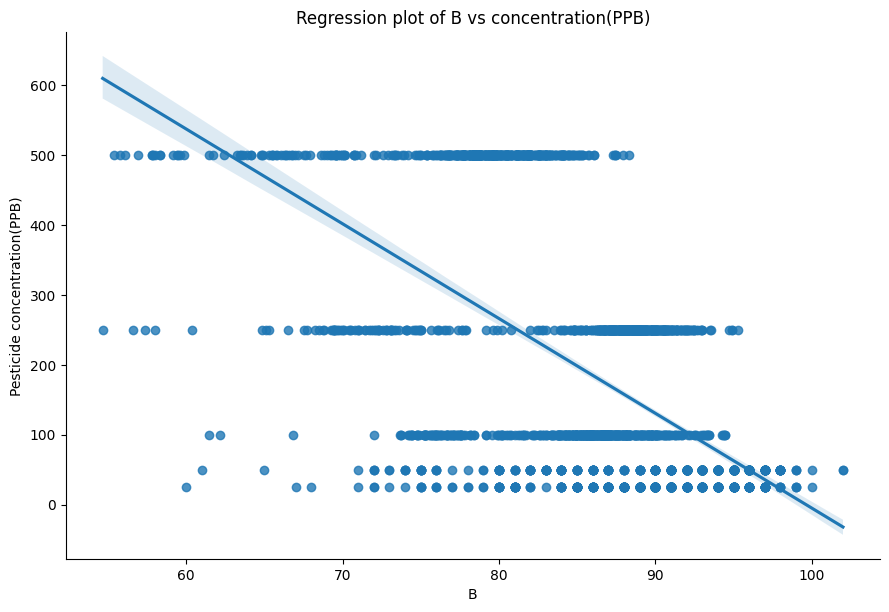

<Figure size 800x800 with 0 Axes>

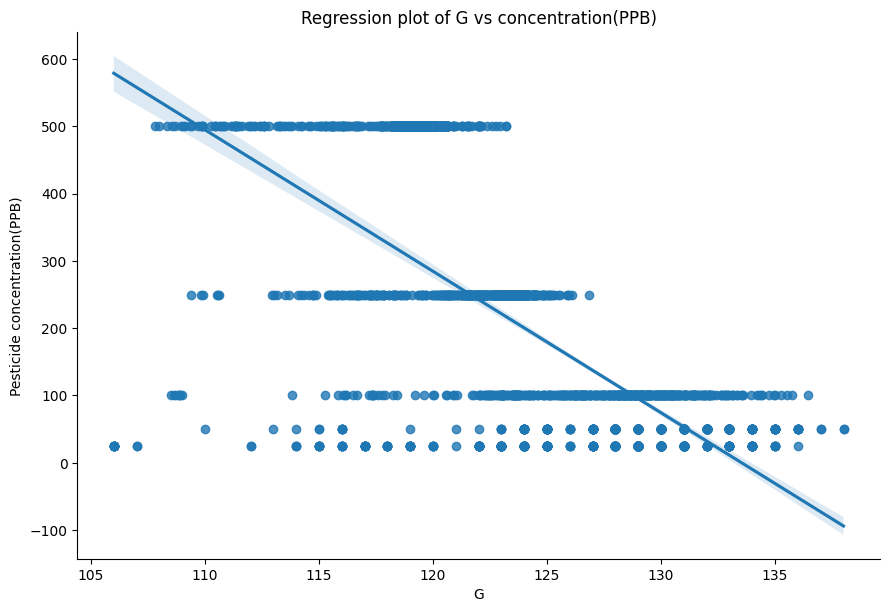

<Figure size 800x800 with 0 Axes>

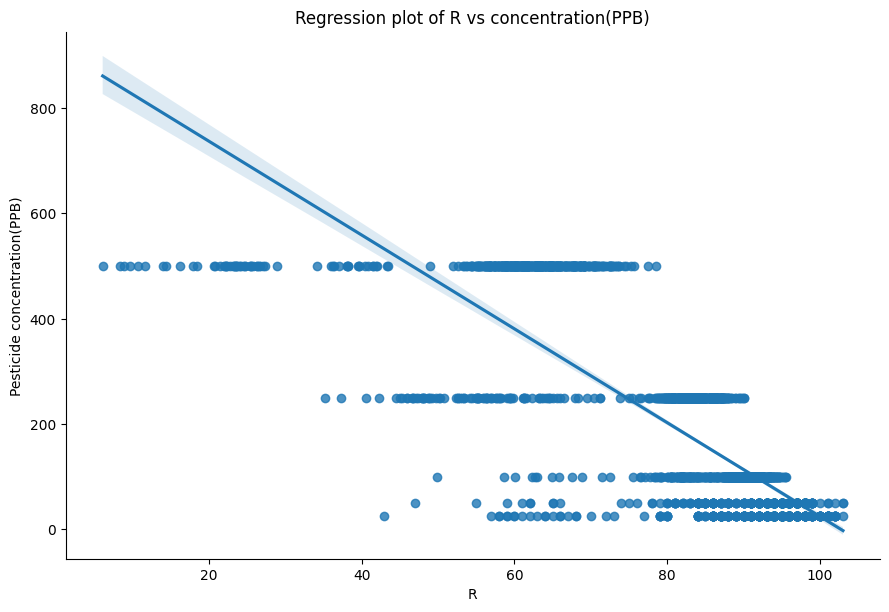

<Figure size 800x800 with 0 Axes>

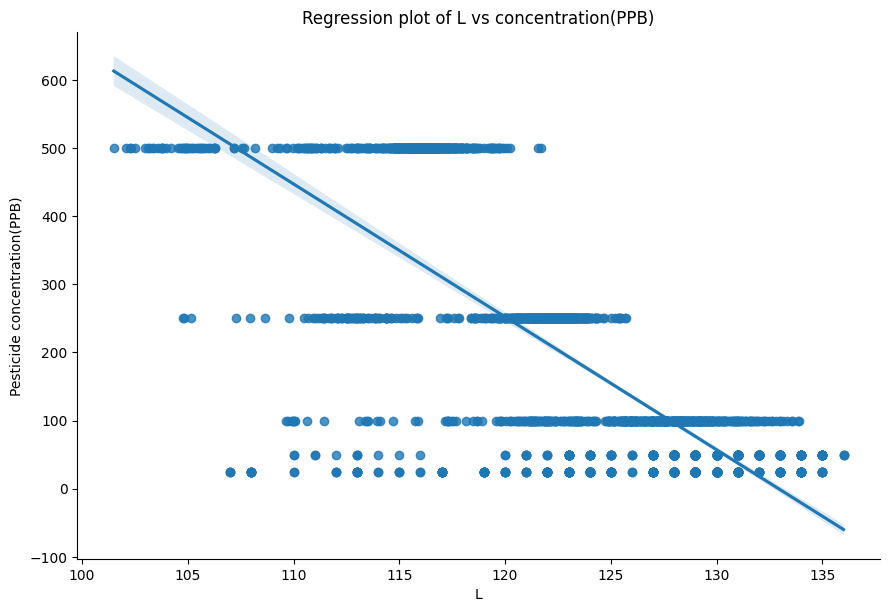

<Figure size 800x800 with 0 Axes>

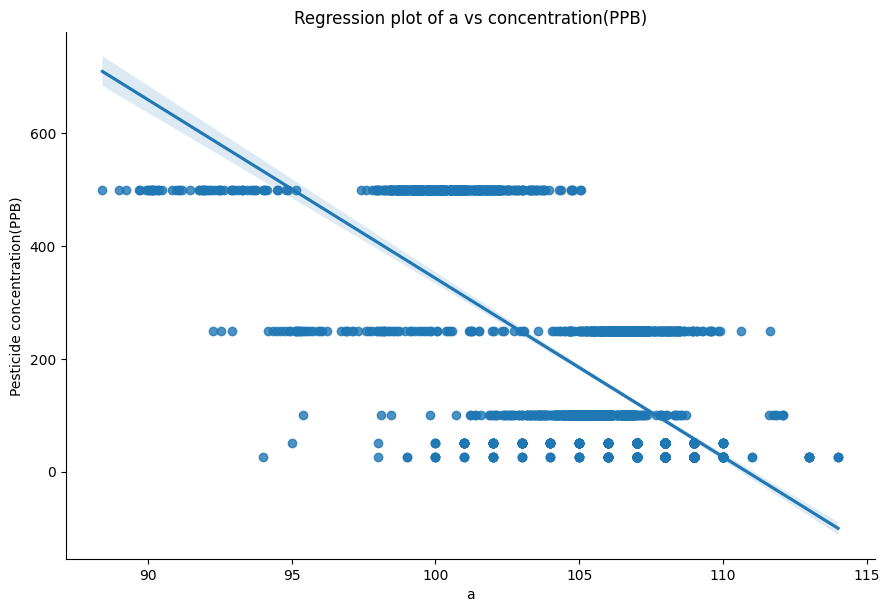

<Figure size 800x800 with 0 Axes>

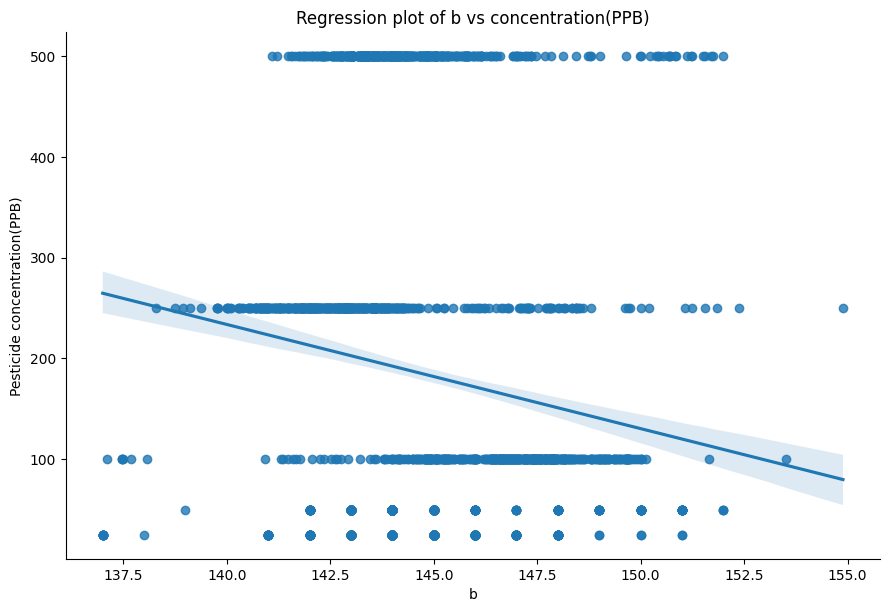

<Figure size 800x800 with 0 Axes>

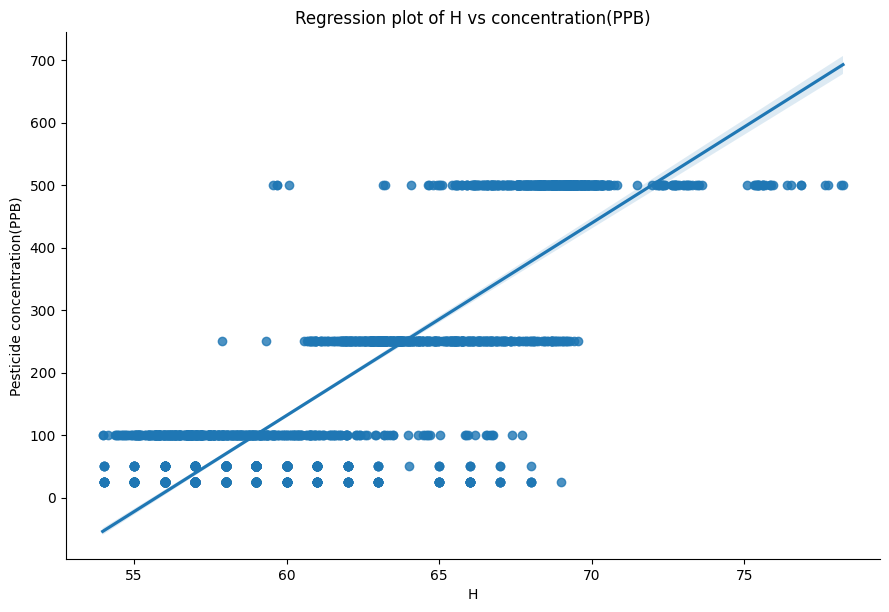

<Figure size 800x800 with 0 Axes>

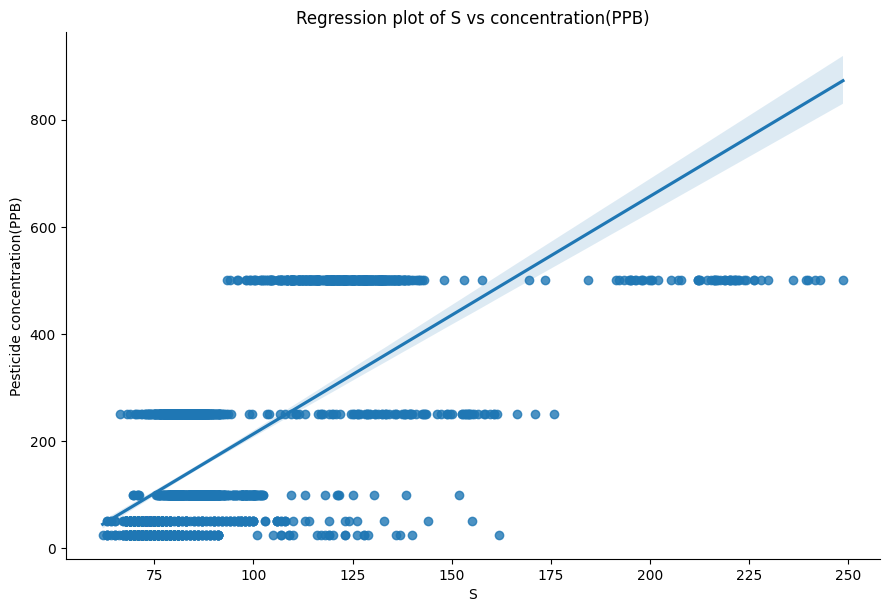

<Figure size 800x800 with 0 Axes>

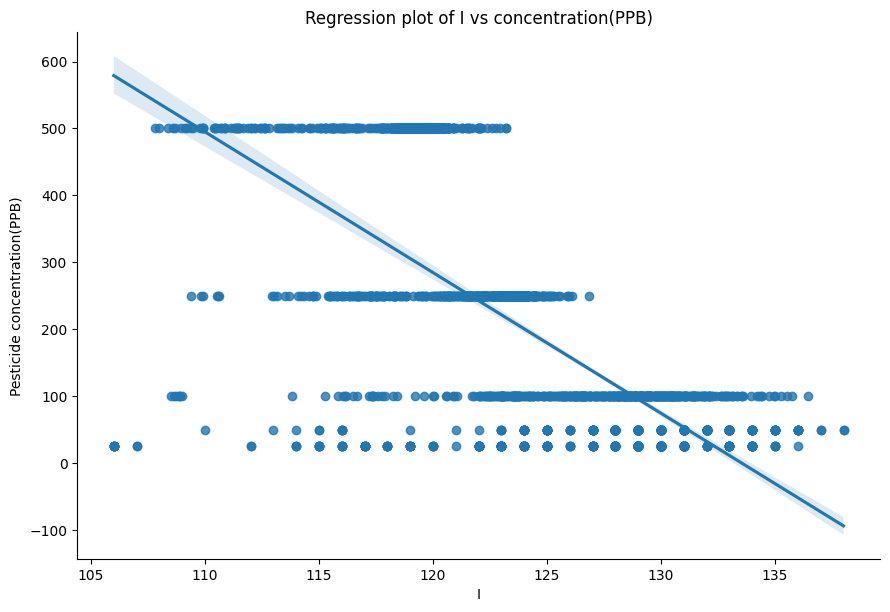

<Figure size 800x800 with 0 Axes>

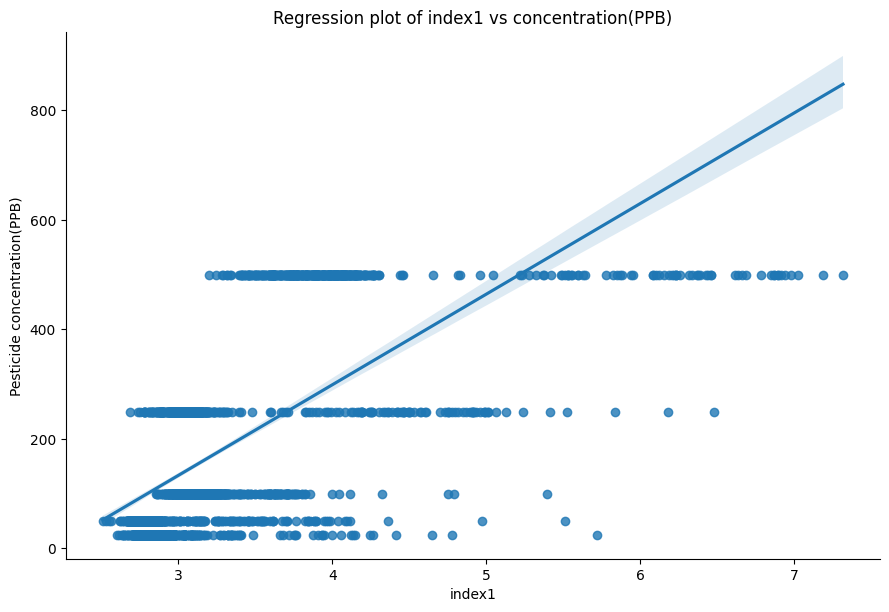

In [ ]:
variables = ['B', 'G', 'R', 'L', 'a', 'b', 'H', 'S', 'I',"index1"]
for var in variables:
    plt.figure(figsize=(8,8))
    sns.lmplot(x=var, y='Conc', data=df, height=6, aspect=1.5)
    plt.title(f'Regression plot of {var} vs concentration(PPB)')
    plt.xlabel(var)
    plt.ylabel('Pesticide concentration(PPB)')
    plt.show()

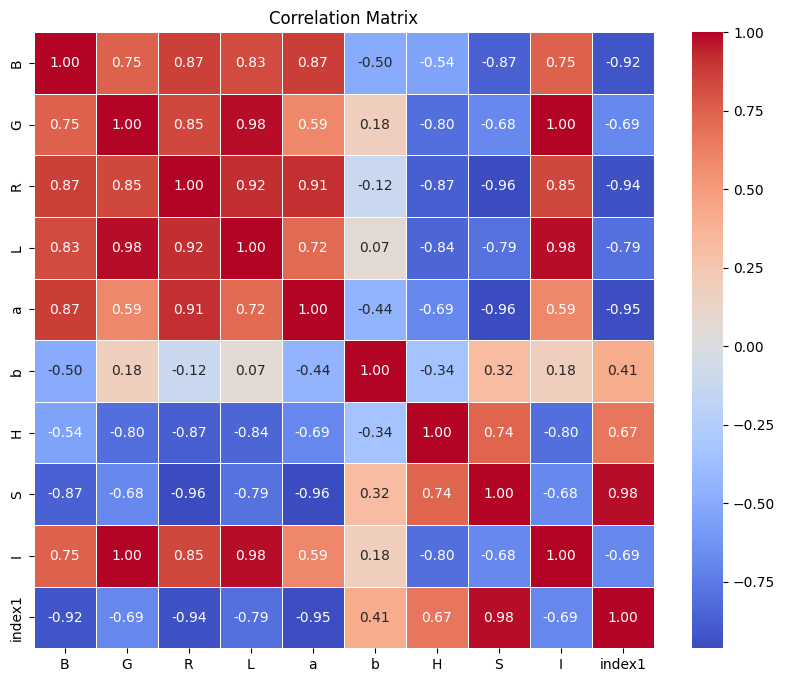

In [ ]:
correlation_matrix = df[variables].corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

In [ ]:
# Set a threshold for high correlation
threshold = 0.90

# Find pairs of highly correlated features
high_corr_pairs = np.where(np.abs(correlation_matrix) > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Print the highly correlated feature pairs
print("Highly correlated feature pairs (correlation > 0.90):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {correlation_matrix.loc[pair[0], pair[1]]}")

# Create a set to hold features to be removed
to_remove = set()

# Iterate through the pairs and add one feature of each pair to the removal set
for pair in high_corr_pairs:
    to_remove.add(pair[1])

# Remove the features from the dataframe
df_selected = df.drop(columns=to_remove)

# Print the selected features
print("Selected features after removing highly correlated ones:")
print(df_selected.columns)

Highly correlated feature pairs (correlation > 0.90):
B and index1 with correlation -0.9227277021950797
G and L with correlation 0.9844844668306875
G and I with correlation 0.9999975437667502
R and L with correlation 0.9215436643246798
R and a with correlation 0.9137654495736494
R and S with correlation -0.9550172347687134
R and index1 with correlation -0.9361018142049087
L and I with correlation 0.9843400191269581
a and S with correlation -0.9614104647548798
a and index1 with correlation -0.9517105594129015
S and index1 with correlation 0.9811671783724402
Selected features after removing highly correlated ones:
Index(['B', 'G', 'R', 'b', 'H', 'Conc'], dtype='object')


In [ ]:
vif_before = calculate_vif(df.drop(columns=["Conc"]))

In [ ]:
vif_after = calculate_vif(df_selected.drop(columns=["Conc"]))

In [ ]:
print("VIF before : ")
print(vif_before)
print(".................")

print("VIF after : ")
print(vif_after)

VIF before : 
  feature           VIF
0       B  5.322305e+04
1       G  1.249662e+08
2       R  1.238539e+04
3       L  2.583575e+05
4       a  7.763223e+04
5       b  1.602316e+05
6       H  7.735125e+03
7       S  1.430326e+03
8       I  1.247801e+08
9  index1  1.990109e+03
.................
VIF after : 
  feature          VIF
0       B  5808.412962
1       G  6423.893785
2       R  1512.933915
3       b  7965.187527
4       H  3381.408732


- So we can see L, I , S, index1, a  are removed due to high multicollinearity
- Removed to avoid Overfitting problems

In [ ]:
df=df_selected.copy() #

In [ ]:

df_25 = df[df["Conc"] == 25]
df_50 = df[df["Conc"] == 50]
df_100 = df[df["Conc"] == 100]
df_250= df[df["Conc"] == 250]
df_500 = df[df["Conc"] == 500]

In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
dfs = {
    25: df_25,
    50: df_50,
    100: df_100,
    250: df_250,
    500: df_500,

}

import pandas as pd
import numpy as np
from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg

def check_multivariate_normality(df):
    results = {}

    # Perform multivariate normality test using pingouin
    mvn_test = pg.multivariate_normality(df)
    results['MVN Test'] = mvn_test

    # Check for multicollinearity using VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    results['VIF'] = vif_data

    # Evaluate sample size
    n_samples, n_features = df.shape
    results['Sample Size'] = n_samples
    results['Number of Features'] = n_features
    results['Sufficient Sample Size'] = n_samples >= n_features * 5

    # Print the results
    print("Multivariate Normality Test results:")
    print(mvn_test)
    print(f"Variance Inflation Factor (VIF):\n{vif_data}")
    print(f"Sample Size: {n_samples}, Number of Features: {n_features}")
    if results['Sufficient Sample Size']:
        print("Sample size is sufficient.")
    else:
        print("Warning: Sample size may be too small for reliable estimation of covariance matrix.")

    return results

# Assuming dfs is defined as a dictionary of DataFrames for each concentration level

# Check applicability for each subset
results = {}
for concentration, df_subset in dfs.items():
    print(f"\nChecking applicability for concentration: {concentration} PPB")
    results[concentration] = check_multivariate_normality(df_subset[['B', 'G', 'R', 'b', 'H']])





Checking applicability for concentration: 25 PPB
Multivariate Normality Test results:
HZResults(hz=7.944367304197189, pval=2.098354673724631e-279, normal=False)
Variance Inflation Factor (VIF):
  feature           VIF
0       B  20102.740842
1       G  10325.791018
2       R   8395.683731
3       b  18266.189575
4       H   9175.031299
Sample Size: 500, Number of Features: 5
Sample size is sufficient.

Checking applicability for concentration: 50 PPB
Multivariate Normality Test results:
HZResults(hz=8.739306002345112, pval=1.4787936523919431e-304, normal=False)
Variance Inflation Factor (VIF):
  feature           VIF
0       B  15774.603585
1       G   8990.067981
2       R   9565.171137
3       b  15027.400733
4       H   8867.560936
Sample Size: 500, Number of Features: 5
Sample size is sufficient.

Checking applicability for concentration: 100 PPB
Multivariate Normality Test results:
HZResults(hz=22.304834127838944, pval=0.0, normal=False)
Variance Inflation Factor (VIF):
  feature

## 1. As it strongly deviates from Multivariate Normality, we cannot use Mahalanobis Distance method in this case.
## Now using Isolation Forest for each conc dfs



Checking assumptions for concentration: 25 PPB


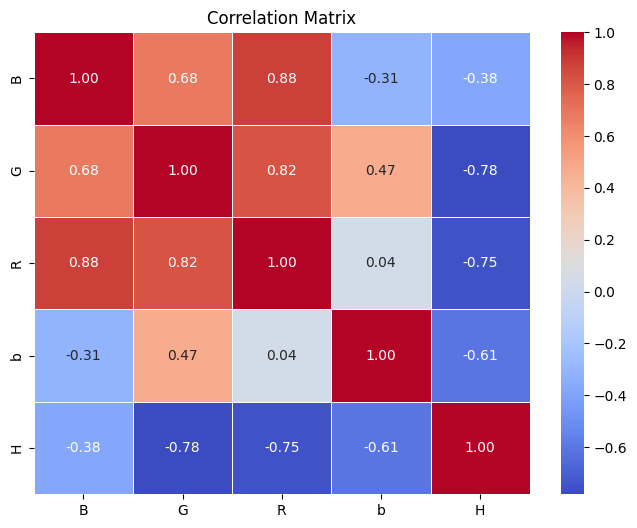

Detected outliers: Index([ 36,  37,  38,  56,  57,  58,  76,  82,  88,  89,
       ...
       477, 478, 480, 481, 482, 483, 484, 485, 486, 487],
      dtype='int64', name='TestNO', length=108)

Checking assumptions for concentration: 50 PPB


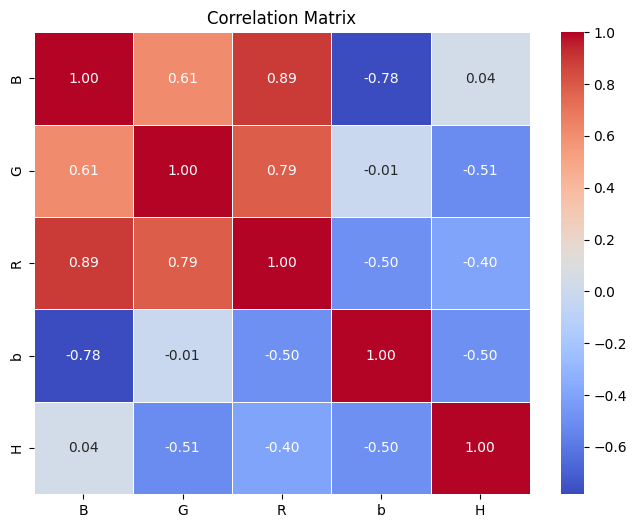

Detected outliers: Index([  6,  11,  25,  44,  57,  73,  97,  99, 101, 136, 177, 197, 210, 244,
       390, 391, 392, 393, 396, 397, 402, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 431, 432, 433, 437,
       438, 442, 443, 444, 445, 446, 447, 451, 452, 453, 458, 459, 463, 466,
       467, 468, 469, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495,
       496, 498, 499],
      dtype='int64', name='TestNO')

Checking assumptions for concentration: 100 PPB


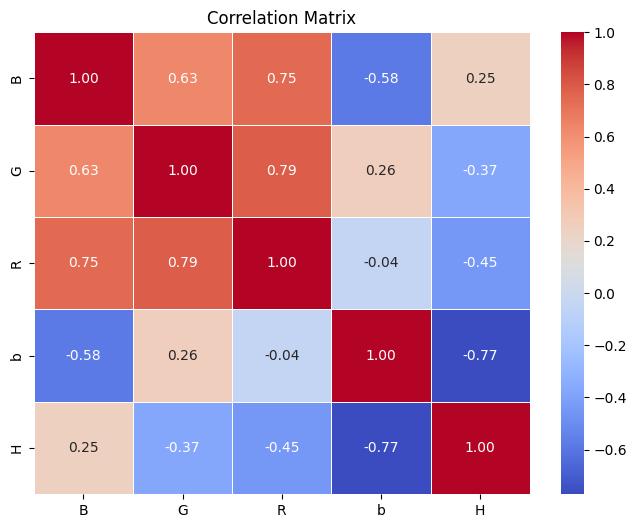

Detected outliers: Index([  1,   2,   6,   7,   8,   9,  10,  11,  12,  13,  14,  18,  19,  24,
        25,  72,  73,  79,  85,  86,  91,  92,  93, 102, 103, 104, 113, 114,
       115, 116, 124, 125, 126, 135, 136, 137, 146, 147, 157, 158, 159, 227,
       247, 291, 301, 322, 323, 324, 325, 326, 327, 377, 405, 406, 407, 408,
       409, 410, 411, 412, 413, 414, 415, 416, 417, 422, 429, 430, 443, 445,
       455, 469, 470, 476, 477, 479, 480, 481, 482, 483, 484, 487, 490, 494,
       497, 498, 499, 500],
      dtype='int64', name='TestNO')

Checking assumptions for concentration: 250 PPB


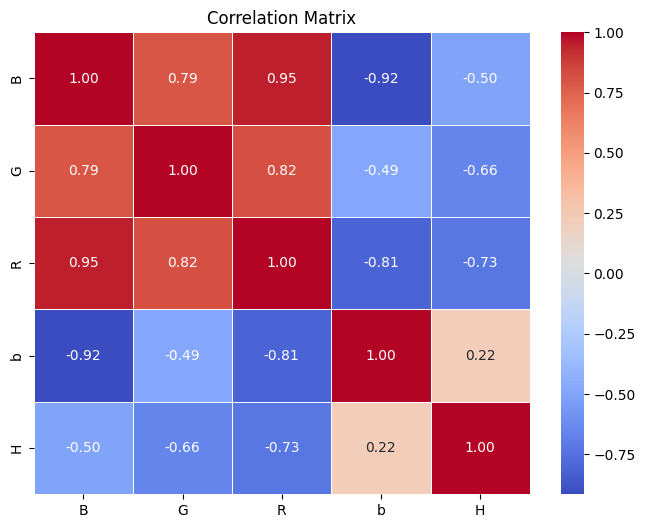

Detected outliers: Index([  3,   4,   7,  18,  20,  29,  30,  32,  62,  95,
       ...
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
      dtype='int64', name='TestNO', length=101)

Checking assumptions for concentration: 500 PPB


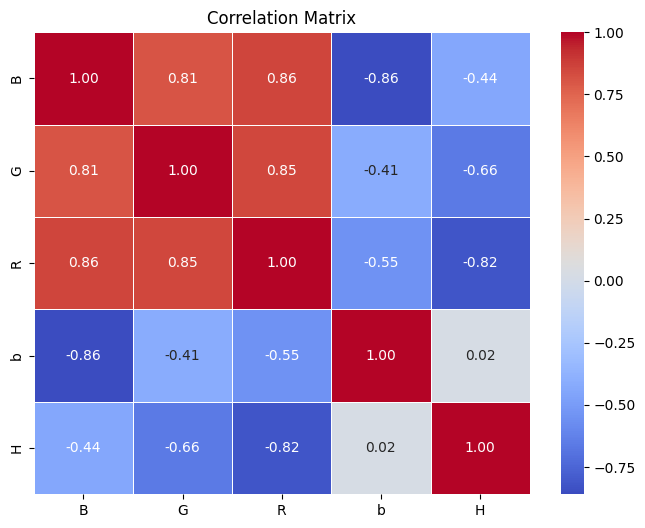

Detected outliers: Index([ 22,  25,  45,  65, 105, 165, 241, 242, 243, 245,
       ...
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
      dtype='int64', name='TestNO', length=104)

Total number of outliers detected: 488
Concentration 25 PPB: 108 outliers
Concentration 50 PPB: 87 outliers
Concentration 100 PPB: 88 outliers
Concentration 250 PPB: 101 outliers
Concentration 500 PPB: 104 outliers


In [ ]:
from sklearn.ensemble import IsolationForest


def check_isolation_forest_assumptions(df_subset, features):
    # Check feature independence (correlation matrix)
    correlation_matrix = df_subset[features].corr()

    # Plot correlation matrix as a heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()

    # Initialize Isolation Forest model
    clf = IsolationForest(random_state=0) #, contamination=0.12)

    # Fit the model
    clf.fit(df_subset[features])

    # Predict outliers (1 for normal, -1 for outliers)
    outliers = clf.predict(df_subset[features])

    # Extract outlier indices (where outliers are -1)
    outlier_indices = df_subset.index[outliers == -1]

    # Print or use outlier_indices as needed
    print("Detected outliers:", outlier_indices)

    # Return the number of outliers
    return len(outlier_indices)

# List of concentration levels
concentration_levels = [25, 50, 100, 250, 500]

# Dictionary of DataFrames for each concentration level
dfs = {
    25: df_25,
    50: df_50,
    100: df_100,
    250: df_250,
    500: df_500,
}

# Features to check
features = ['B', 'G', 'R', 'b', 'H']

# Apply the function for each subset and collect the number of outliers
total_outliers = 0
outliers_per_concentration = {}

for conc, df_subset in dfs.items():
    print(f"\nChecking assumptions for concentration: {conc} PPB")
    num_outliers = check_isolation_forest_assumptions(df_subset, features)
    outliers_per_concentration[conc] = num_outliers
    total_outliers += num_outliers

# Print the total number of outliers detected
print("\nTotal number of outliers detected:", total_outliers)

# Print the number of outliers for each concentration level
for conc, num_outliers in outliers_per_concentration.items():
    print(f"Concentration {conc} PPB: {num_outliers} outliers")


- As it strongly deviates from Multivariate Normality and have high VIF(Multicollineary present) we cannot directly use Mahalanobis distance for outlier detection.


Processing outliers for concentration: 25 PPB


<ipython-input-28-dd5fb9cb878c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['outliers'] = clf.predict(df_subset[features])


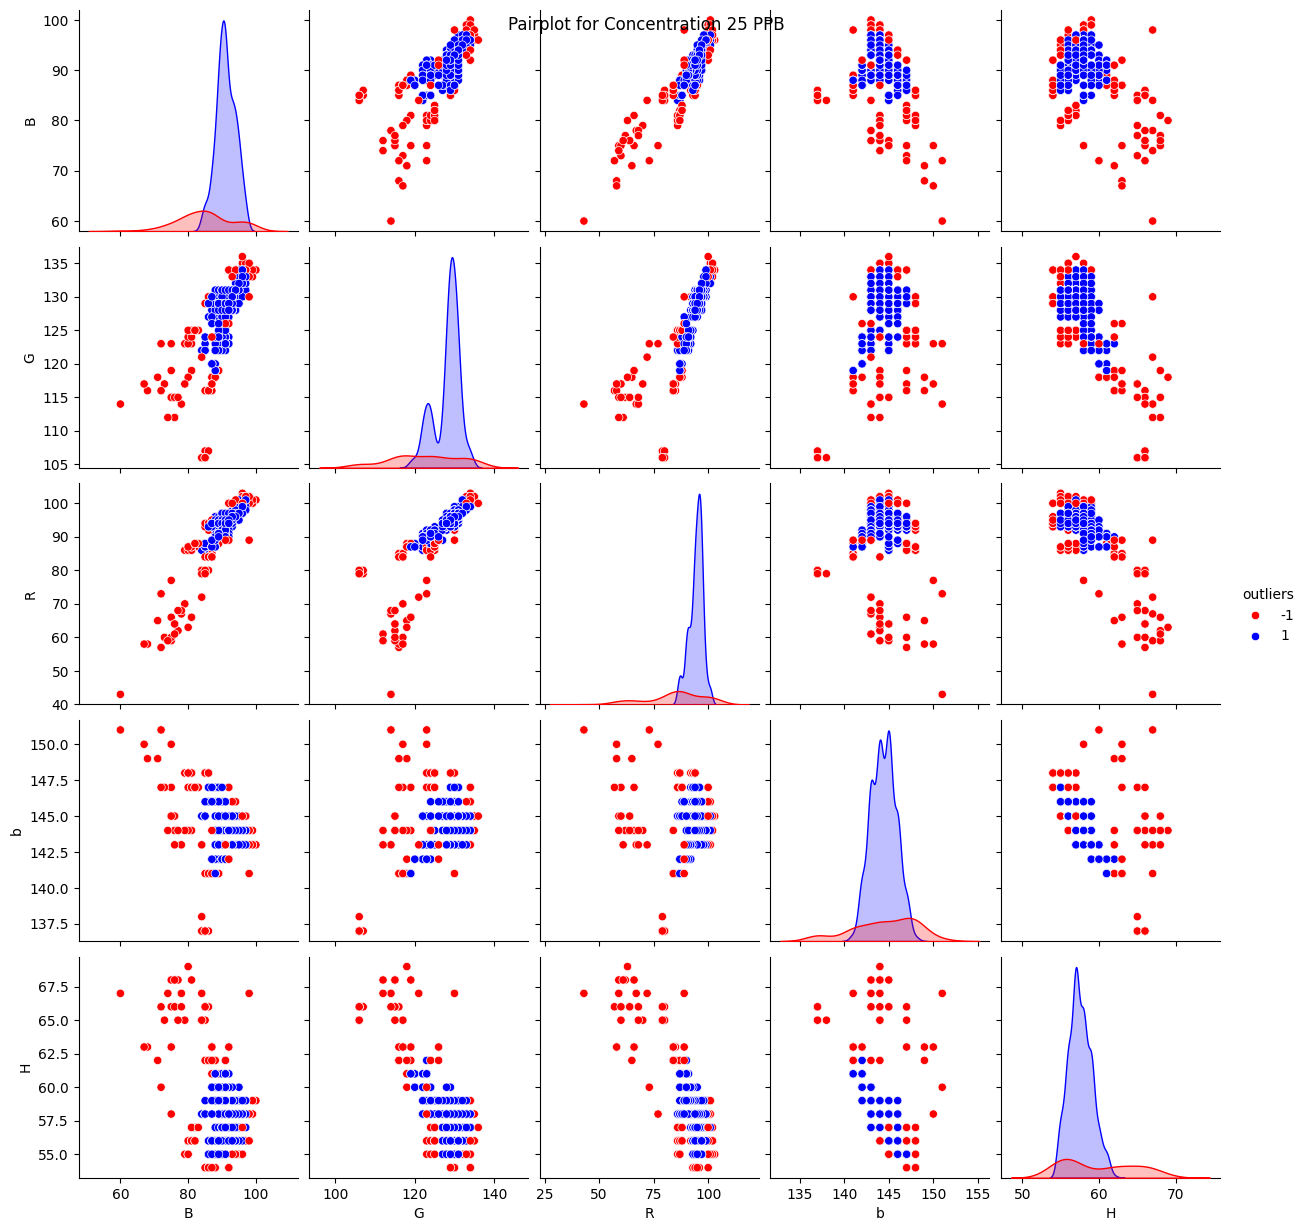


Processing outliers for concentration: 50 PPB


<ipython-input-28-dd5fb9cb878c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['outliers'] = clf.predict(df_subset[features])


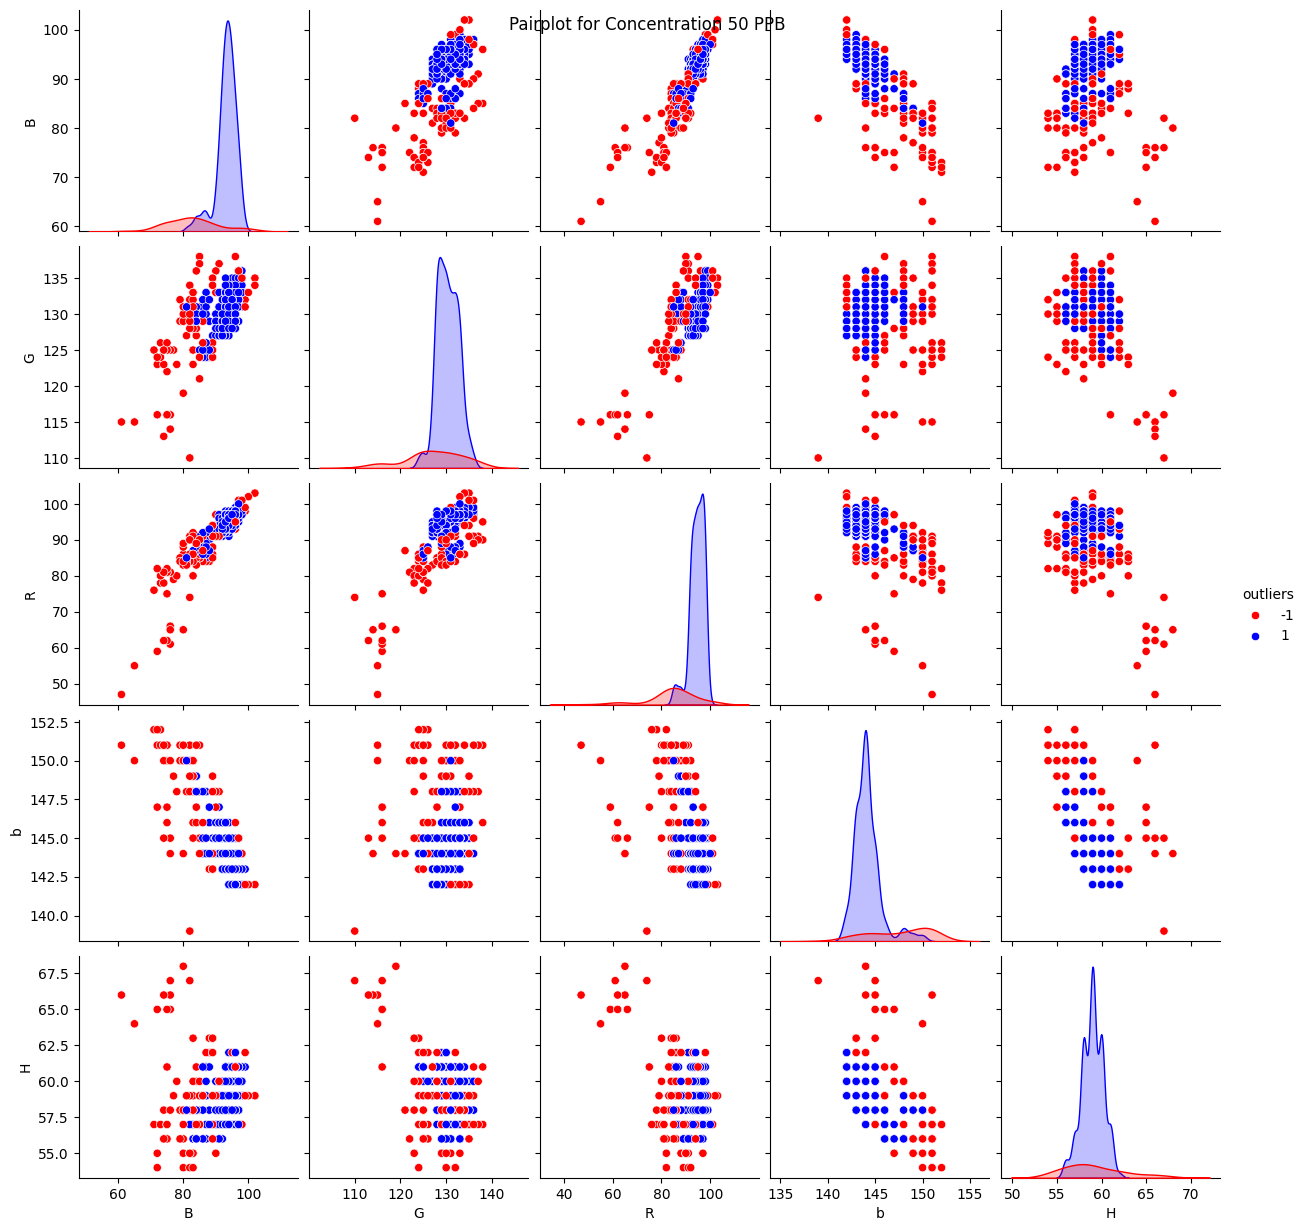


Processing outliers for concentration: 100 PPB


<ipython-input-28-dd5fb9cb878c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['outliers'] = clf.predict(df_subset[features])


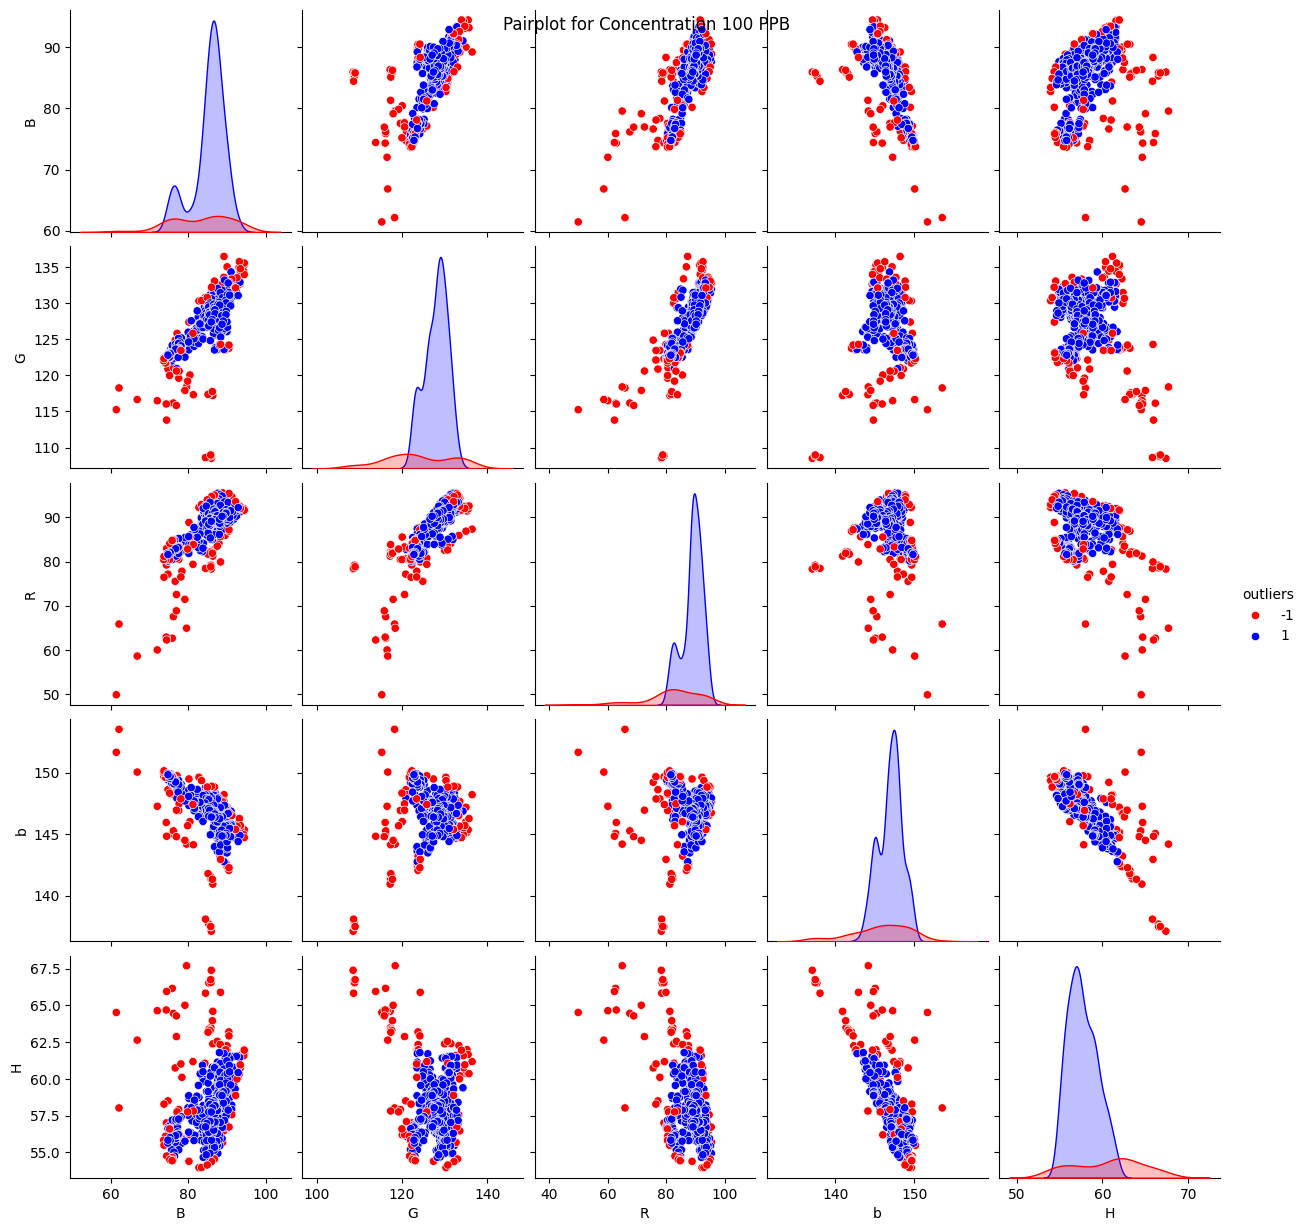


Processing outliers for concentration: 250 PPB


<ipython-input-28-dd5fb9cb878c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['outliers'] = clf.predict(df_subset[features])


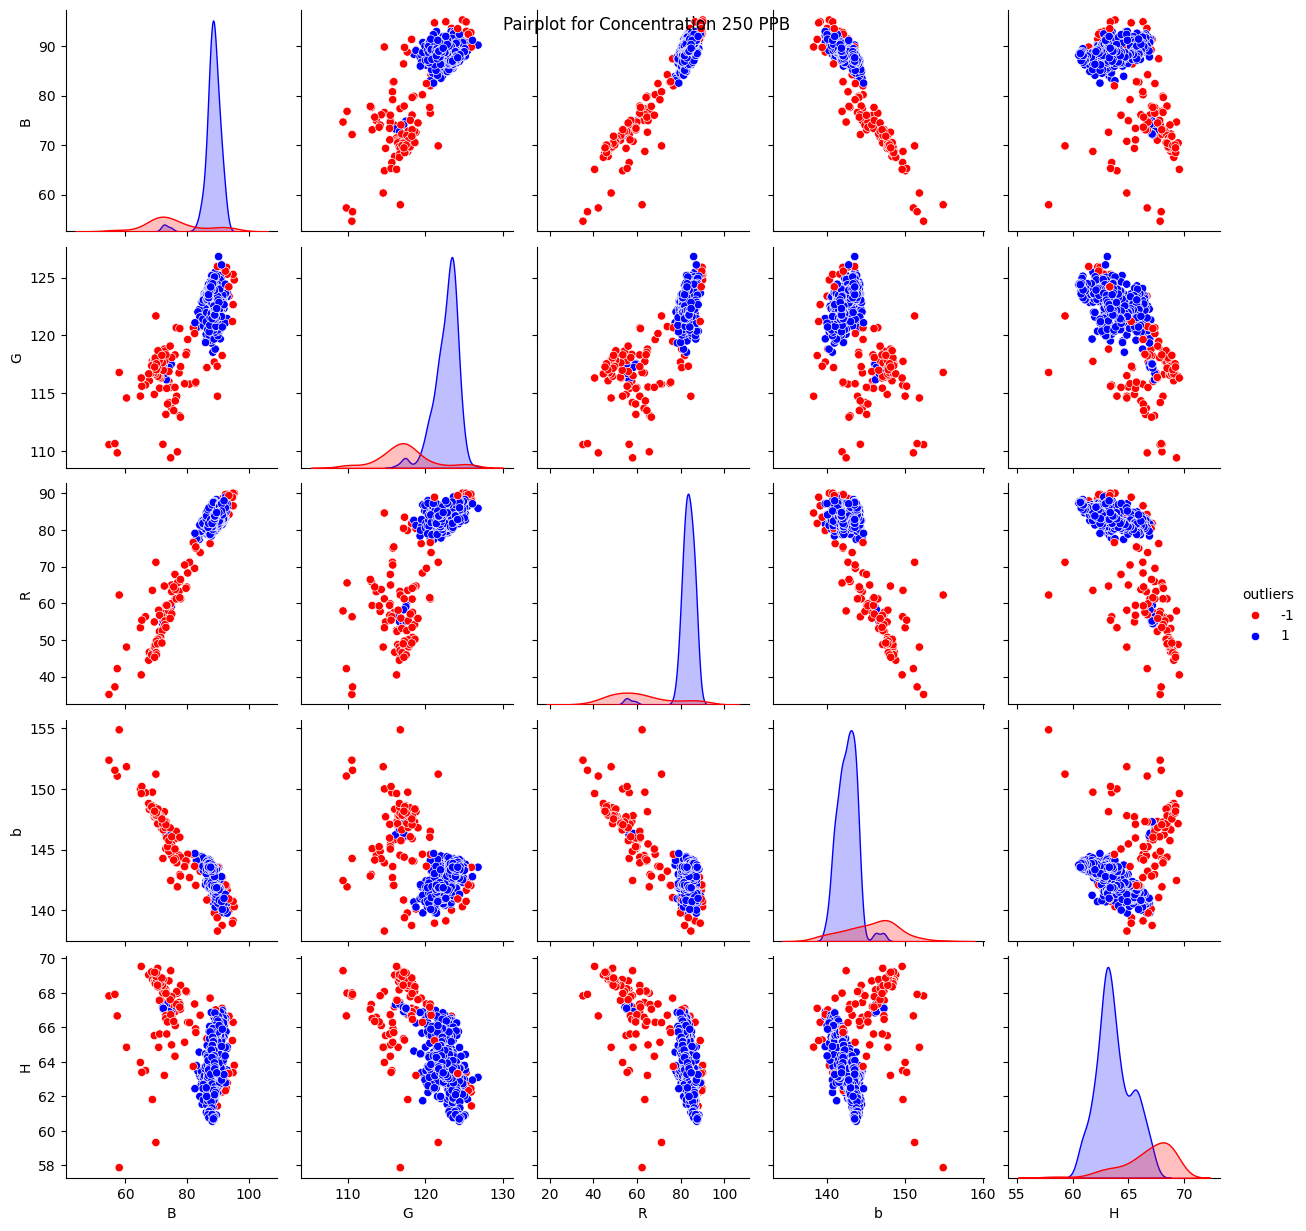


Processing outliers for concentration: 500 PPB


<ipython-input-28-dd5fb9cb878c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['outliers'] = clf.predict(df_subset[features])


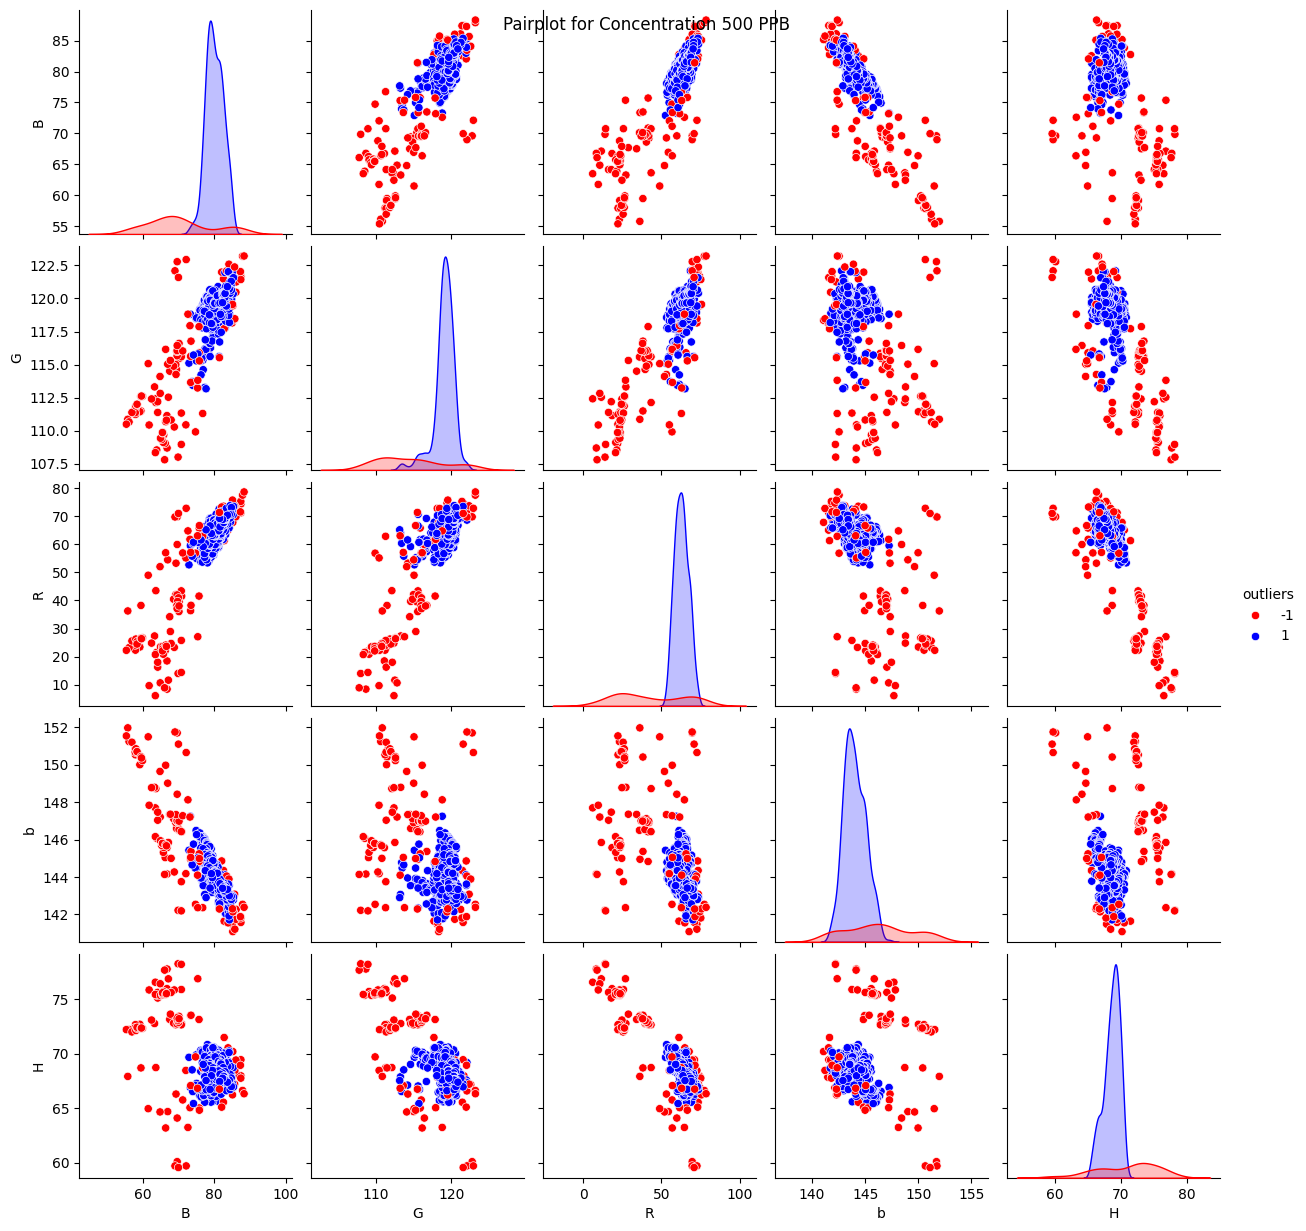

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest



def detect_outliers(df_subset, features):
    # Initialize Isolation Forest model
    clf = IsolationForest(random_state=0)#, contamination=0.1)

    # Fit the model on the selected features
    clf.fit(df_subset[features])

    # Predict outliers (1 for normal, -1 for outliers)
    df_subset['outliers'] = clf.predict(df_subset[features])

    return df_subset

def remove_outliers(df_subset):
    # Remove outliers
    df_cleaned = df_subset[df_subset['outliers'] == 1].copy()
    df_cleaned.drop(columns='outliers', inplace=True)

    return df_cleaned

def detect_and_visualize_outliers(df_subset, concentration, features):
    # Detect outliers
    df_with_outliers = detect_outliers(df_subset, features)

    # Plot a pairplot to visualize the outliers
    sns.pairplot(df_with_outliers[features + ['outliers']], hue='outliers', palette={1: 'blue', -1: 'red'}, diag_kind='kde')
    plt.suptitle(f'Pairplot for Concentration {concentration} PPB')
    plt.show()

    return df_with_outliers

# Dictionary to store cleaned DataFrames
cleaned_dfs = {}

# Detect, visualize, and clean outliers for each subset
for concentration, df_subset in dfs.items():
    print(f"\nProcessing outliers for concentration: {concentration} PPB")

    # Detect and visualize outliers
    df_with_outliers = detect_and_visualize_outliers(df_subset, concentration, features)

    # Remove outliers
    cleaned_df = remove_outliers(df_with_outliers)
    cleaned_dfs[concentration] = cleaned_df


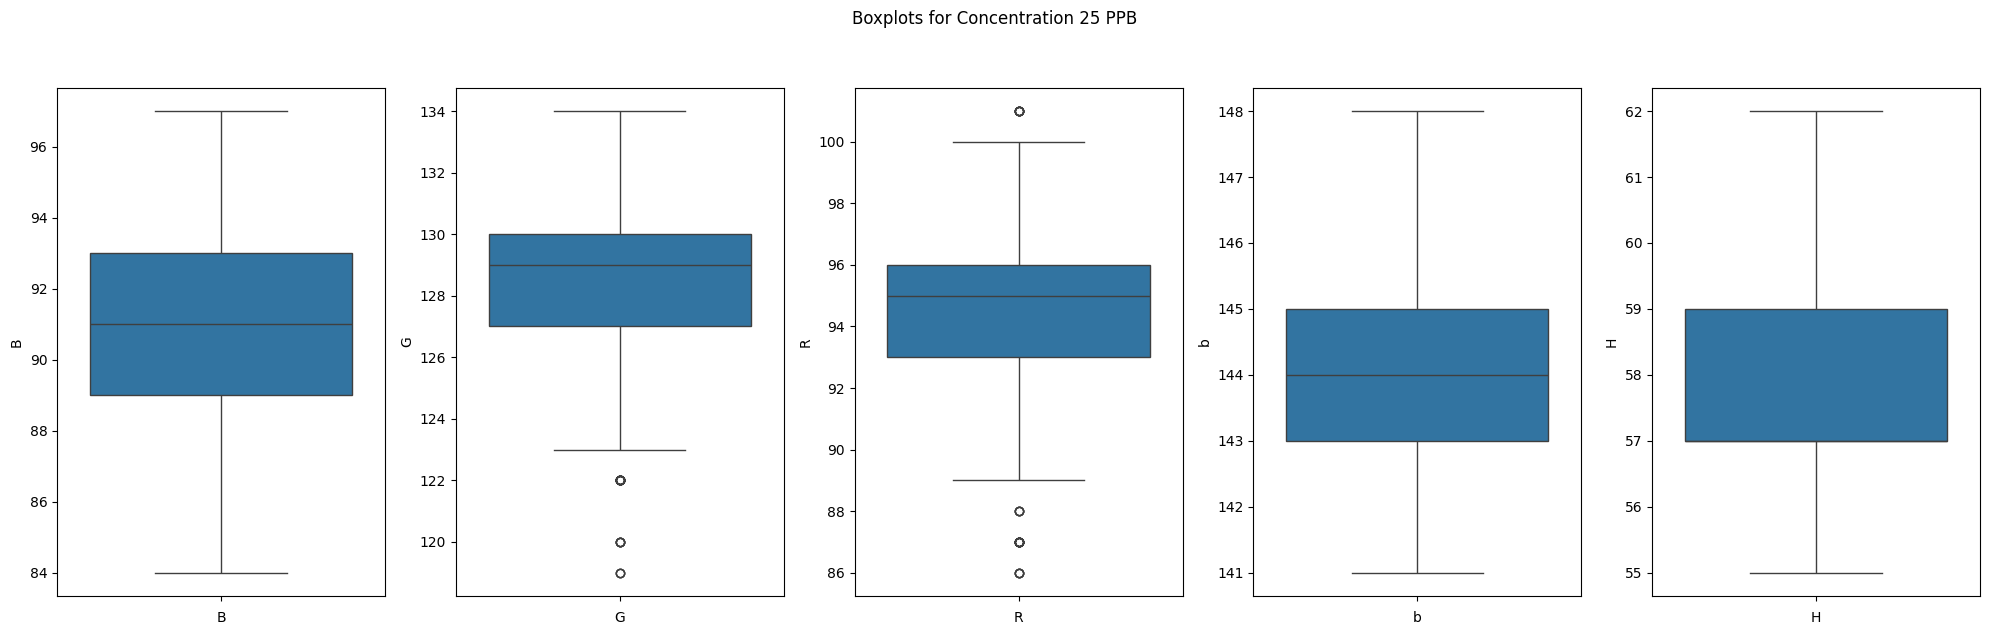

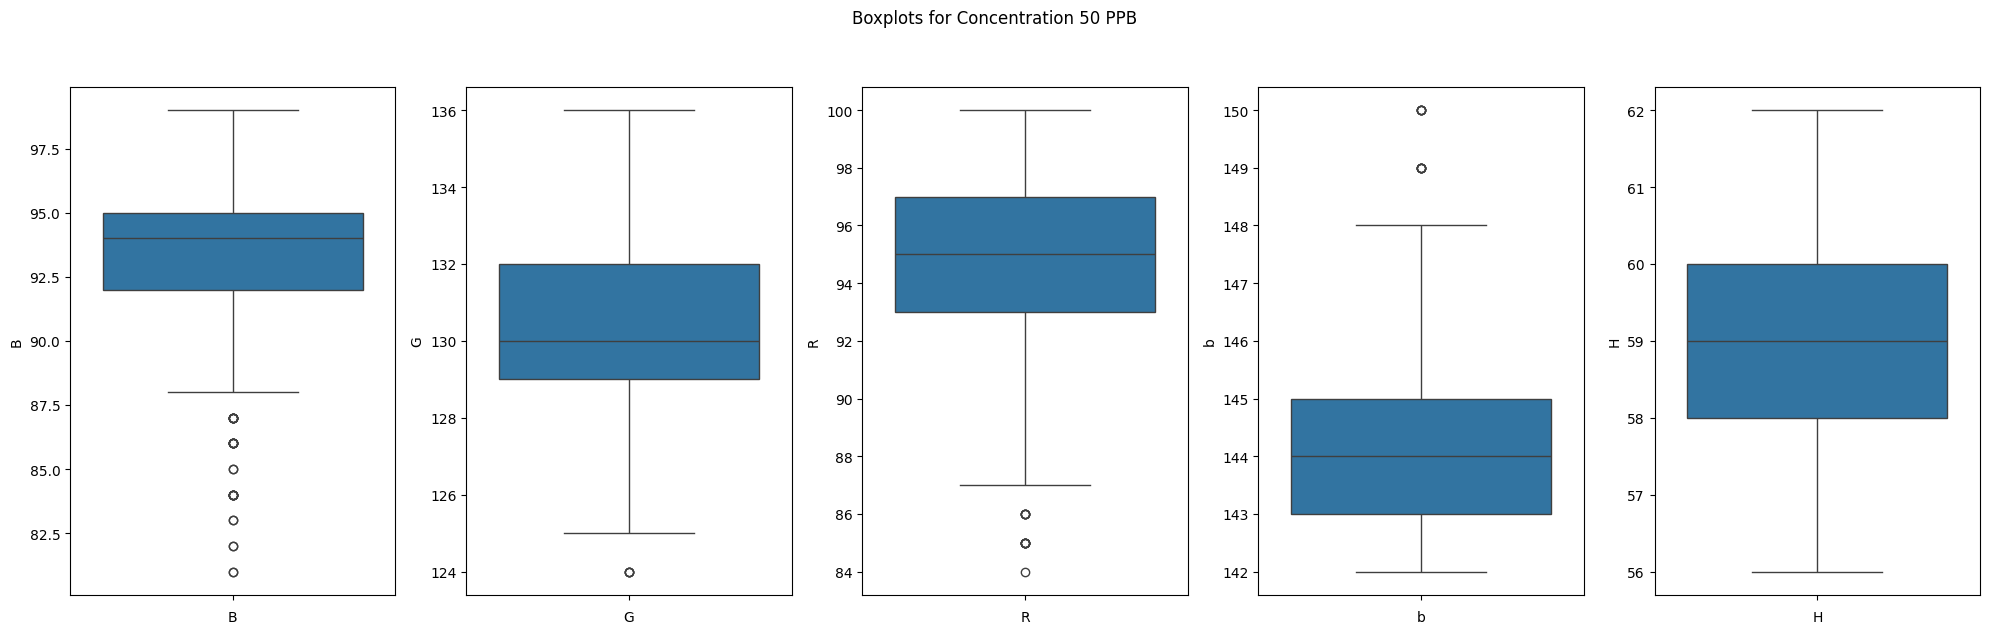

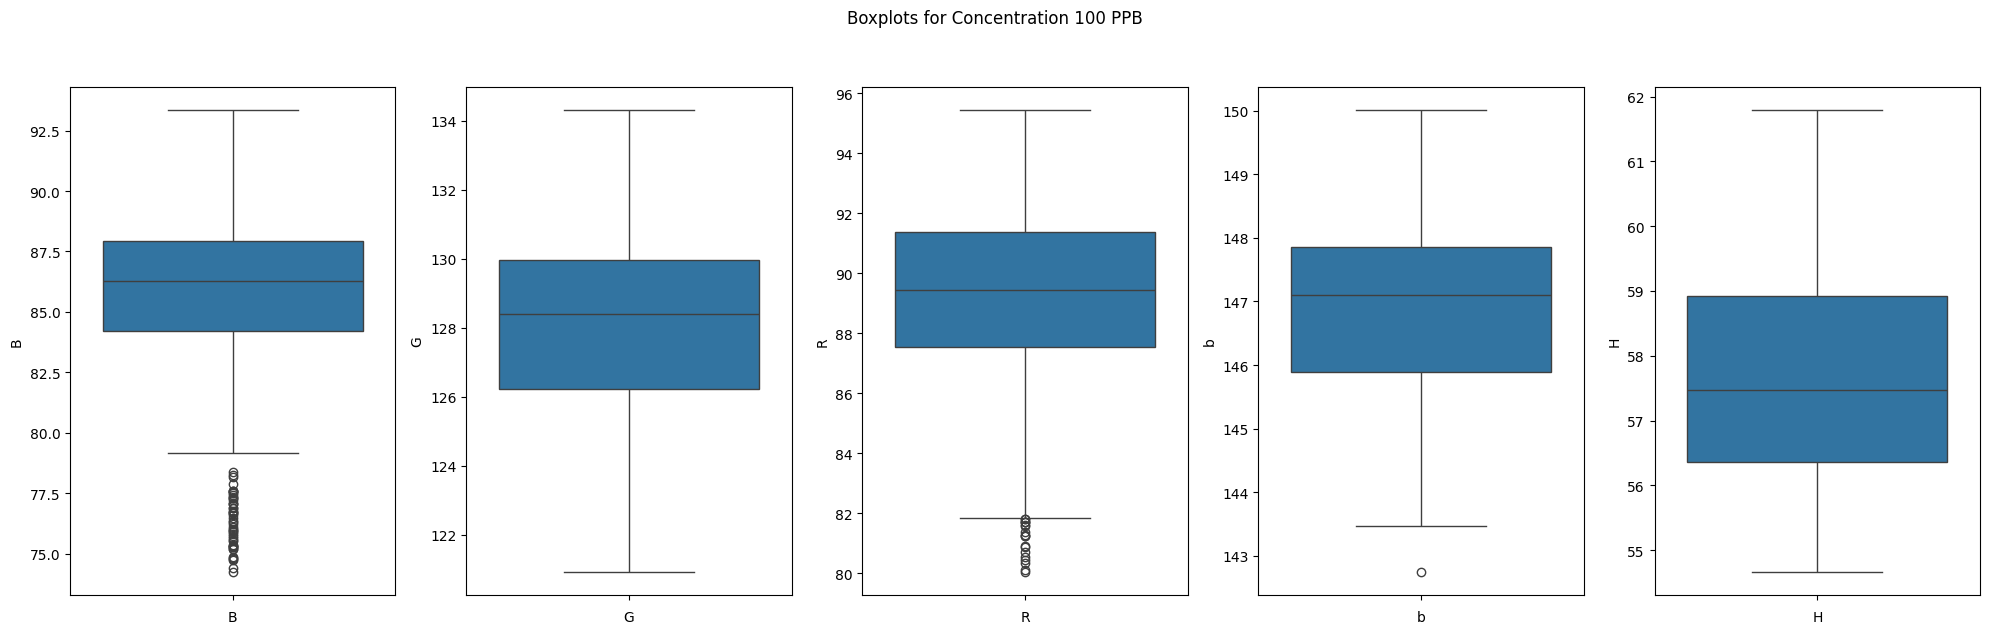

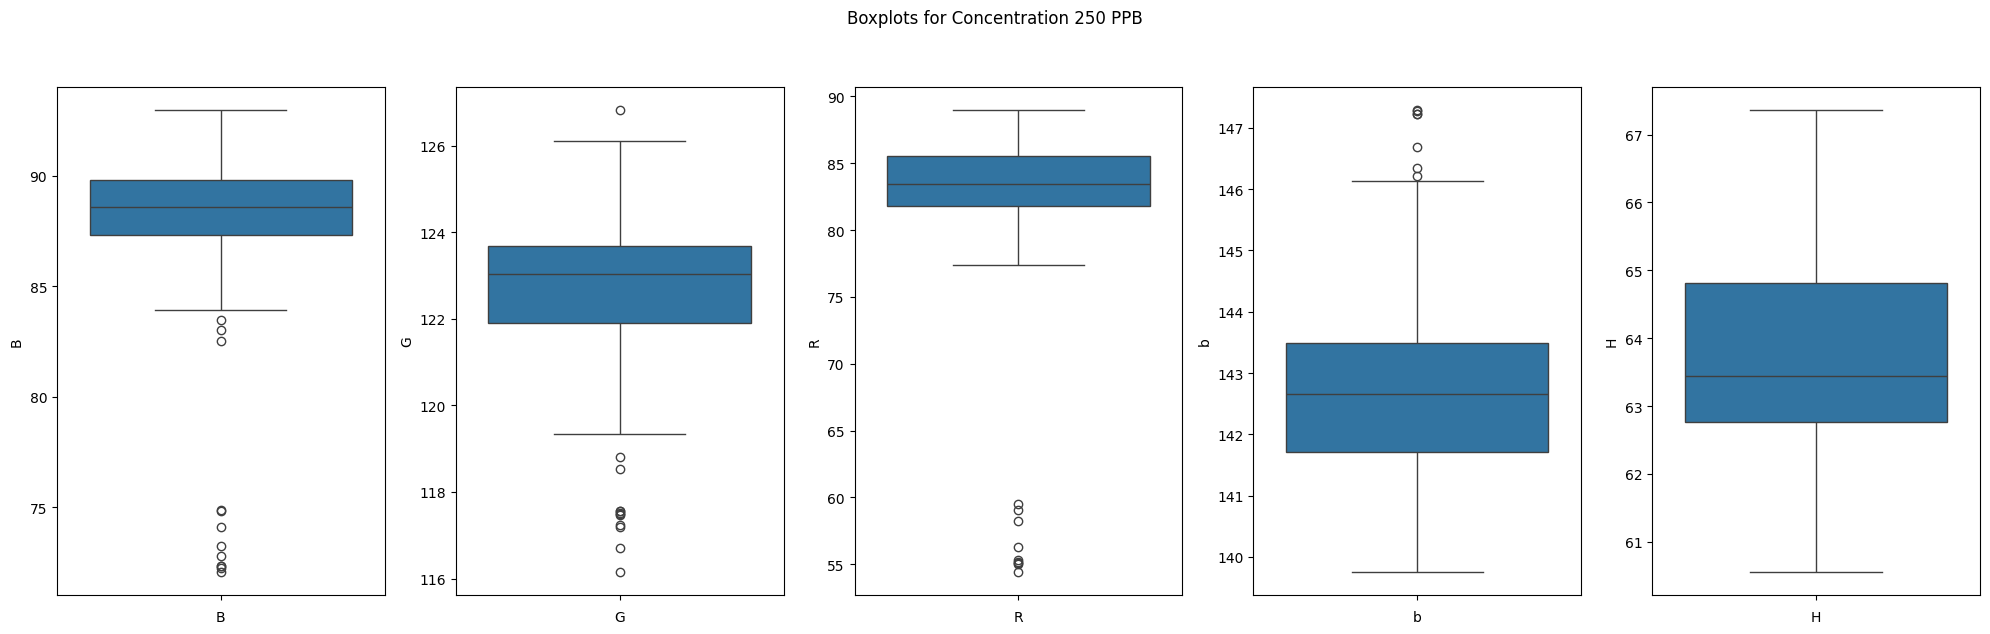

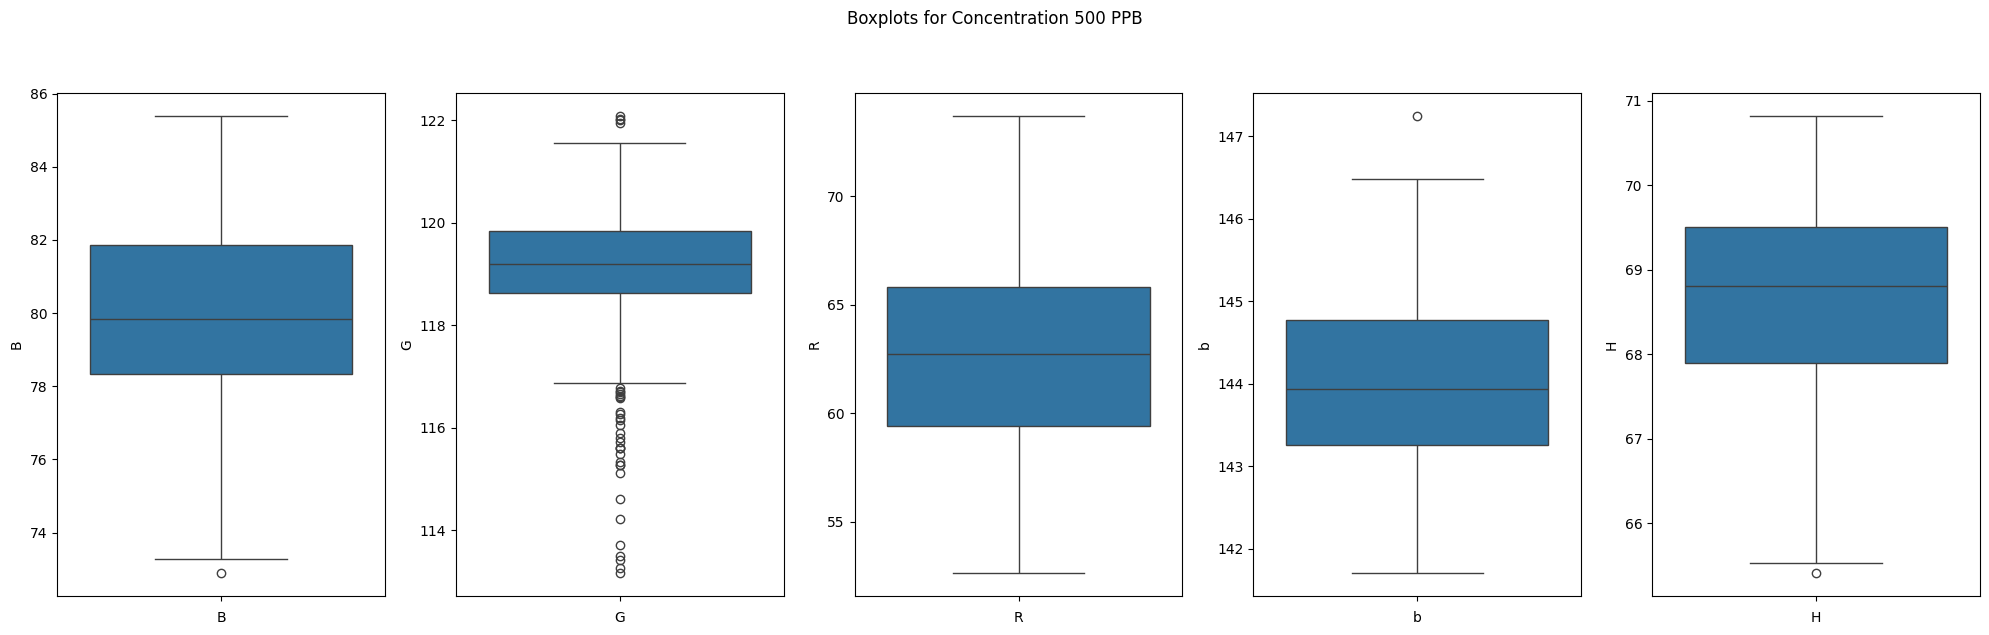

In [ ]:
for concentration, df_subset in cleaned_dfs.items():
    fig, axes = plt.subplots(nrows=1, ncols=len(df_subset[features].columns), figsize=(20, 6))  # Adjusted figsize for better layout
    fig.suptitle(f'Boxplots for Concentration {concentration} PPB', y=1.05)  # Title for the entire figure

    for i, column in enumerate(df_subset[features].columns):
        sns.boxplot(df_subset[features], y=column, ax=axes[i])  # Correctly passing the entire DataFrame and specifying the column
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [ ]:
def get_outliers_iqr(df, k=2):
    outliers_dict = {}
    outliers_count = {}

    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers
        outliers_count[column] = outliers.shape[0]

    return outliers_dict, outliers_count

# Initialize total counters for all concentrations
total_outliers_all_concentrations = 0
total_outliers_dict_all_concentrations = {}

# Example usage for cleaned_dfs
for concentration, df_subset in cleaned_dfs.items():
    outliers_dict, outliers_count = get_outliers_iqr(df_subset[features], k=1.5)

    print(f"\nNumber of outliers in each column for concentration {concentration} PPB:")
    total_outliers = 0
    for column, count in outliers_count.items():
        print(f"{column}: {count}")
        total_outliers += count
        # Accumulate outliers for all concentrations
        total_outliers_all_concentrations += count
        if column not in total_outliers_dict_all_concentrations:
            total_outliers_dict_all_concentrations[column] = 0
        total_outliers_dict_all_concentrations[column] += count

    print(f"Total number of outliers for concentration {concentration} PPB: {total_outliers}")

# Print the total number of outliers across all concentrations
print("\nTotal number of outliers across all concentrations:")
print(f"Total number of outliers: {total_outliers_all_concentrations}")

# Optionally, print the total outliers for each column across all concentrations
print("\nTotal number of outliers for each column across all concentrations:")
for column, count in total_outliers_dict_all_concentrations.items():
    print(f"{column}: {count}")



Number of outliers in each column for concentration 25 PPB:
B: 0
G: 30
R: 30
b: 0
H: 0
Total number of outliers for concentration 25 PPB: 60

Number of outliers in each column for concentration 50 PPB:
B: 32
G: 4
R: 13
b: 11
H: 0
Total number of outliers for concentration 50 PPB: 60

Number of outliers in each column for concentration 100 PPB:
B: 51
G: 0
R: 19
b: 1
H: 0
Total number of outliers for concentration 100 PPB: 71

Number of outliers in each column for concentration 250 PPB:
B: 12
G: 12
R: 9
b: 7
H: 0
Total number of outliers for concentration 250 PPB: 40

Number of outliers in each column for concentration 500 PPB:
B: 1
G: 34
R: 0
b: 1
H: 1
Total number of outliers for concentration 500 PPB: 37

Total number of outliers across all concentrations:
Total number of outliers: 268

Total number of outliers for each column across all concentrations:
B: 96
G: 80
R: 71
b: 20
H: 1


- As it is a experimental data we can remove these 268 univariate outliers from a dataset of 2012.

In [ ]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for column in df_clean.select_dtypes(include=[np.number]).columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

In [ ]:
dfs_removed_outliers={}   ## Have to  consider this in our pipeline so that test data can be capped.

for concentration, df_subset in cleaned_dfs.items():
    print(f"\nRemoving outliers for concentration: {concentration} PPB")
    dfs_removed_outliers[concentration] = remove_outliers_iqr(df_subset.copy())


Removing outliers for concentration: 25 PPB

Removing outliers for concentration: 50 PPB

Removing outliers for concentration: 100 PPB

Removing outliers for concentration: 250 PPB

Removing outliers for concentration: 500 PPB


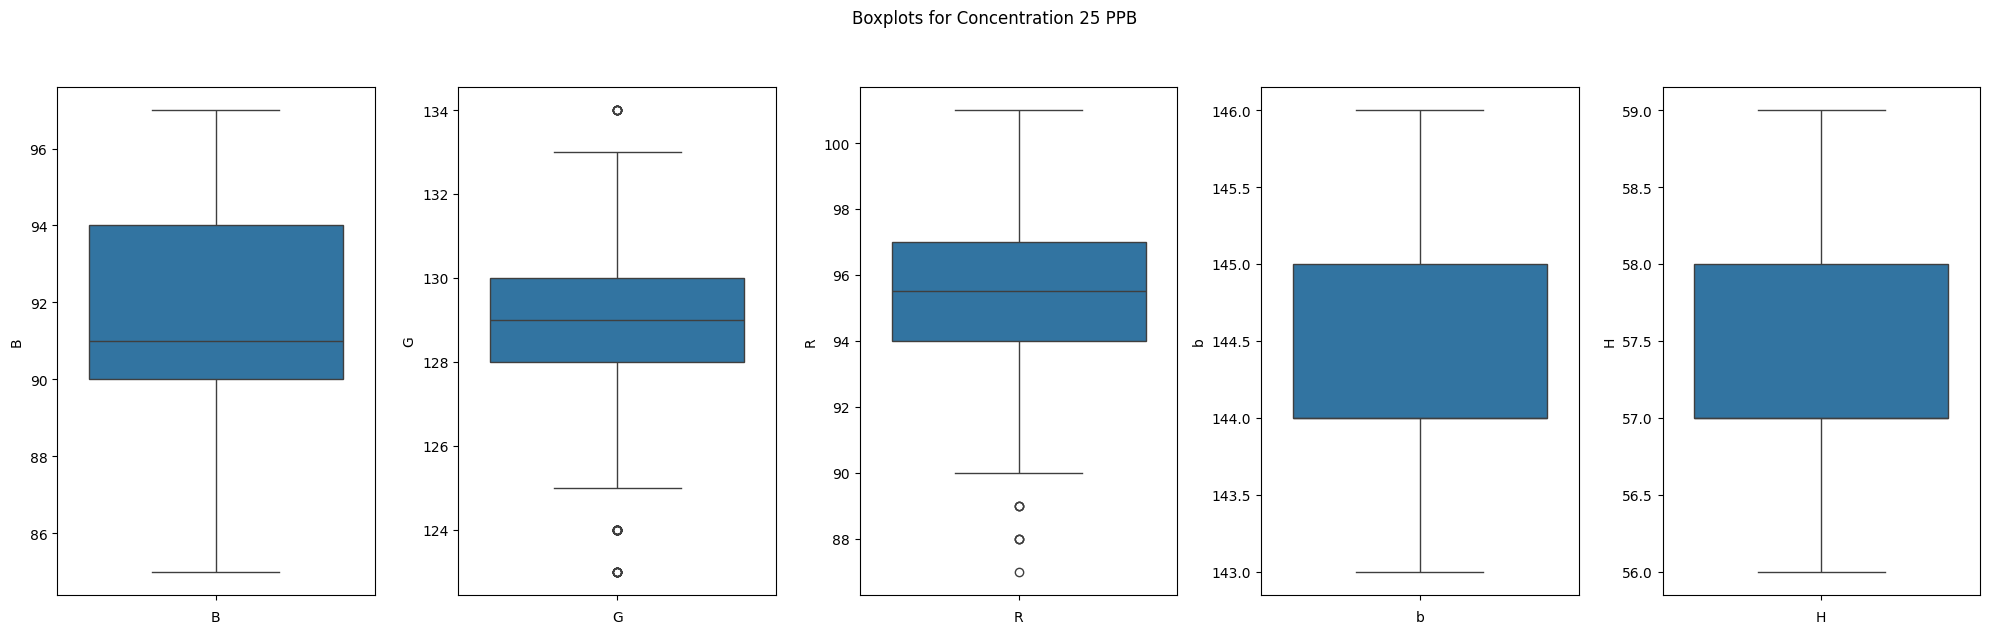

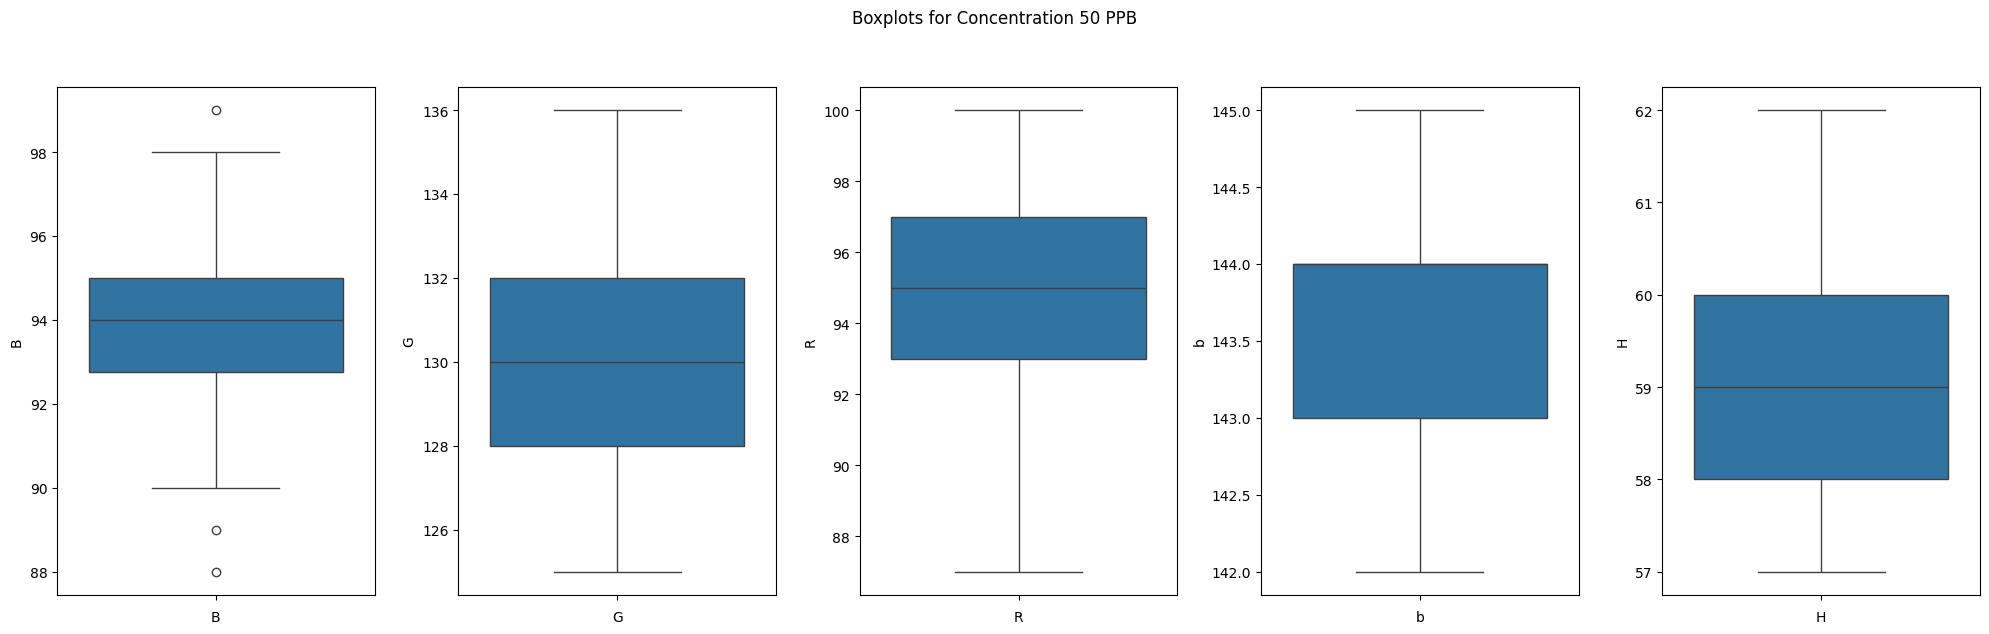

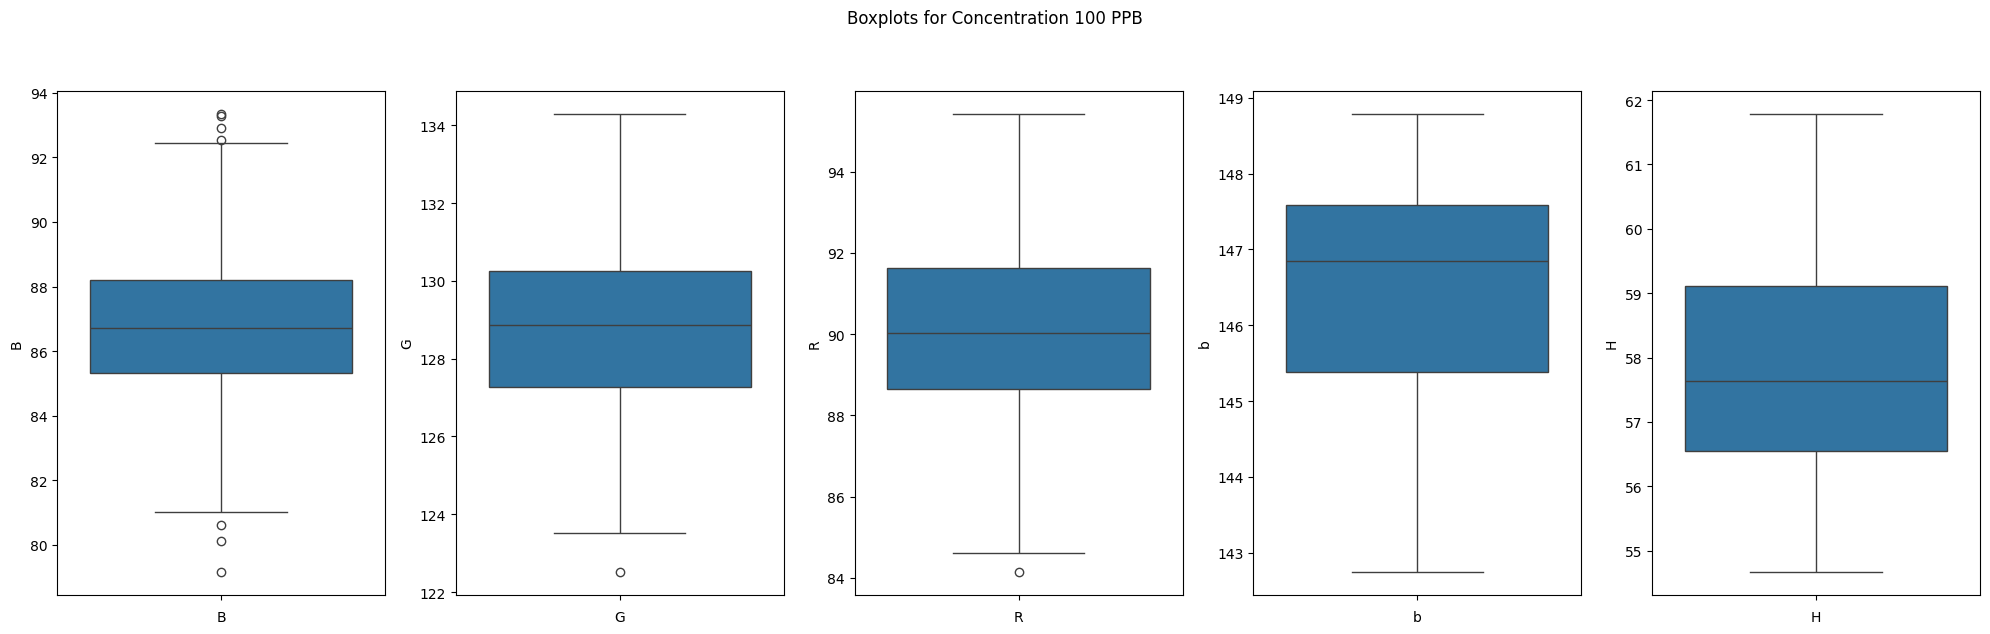

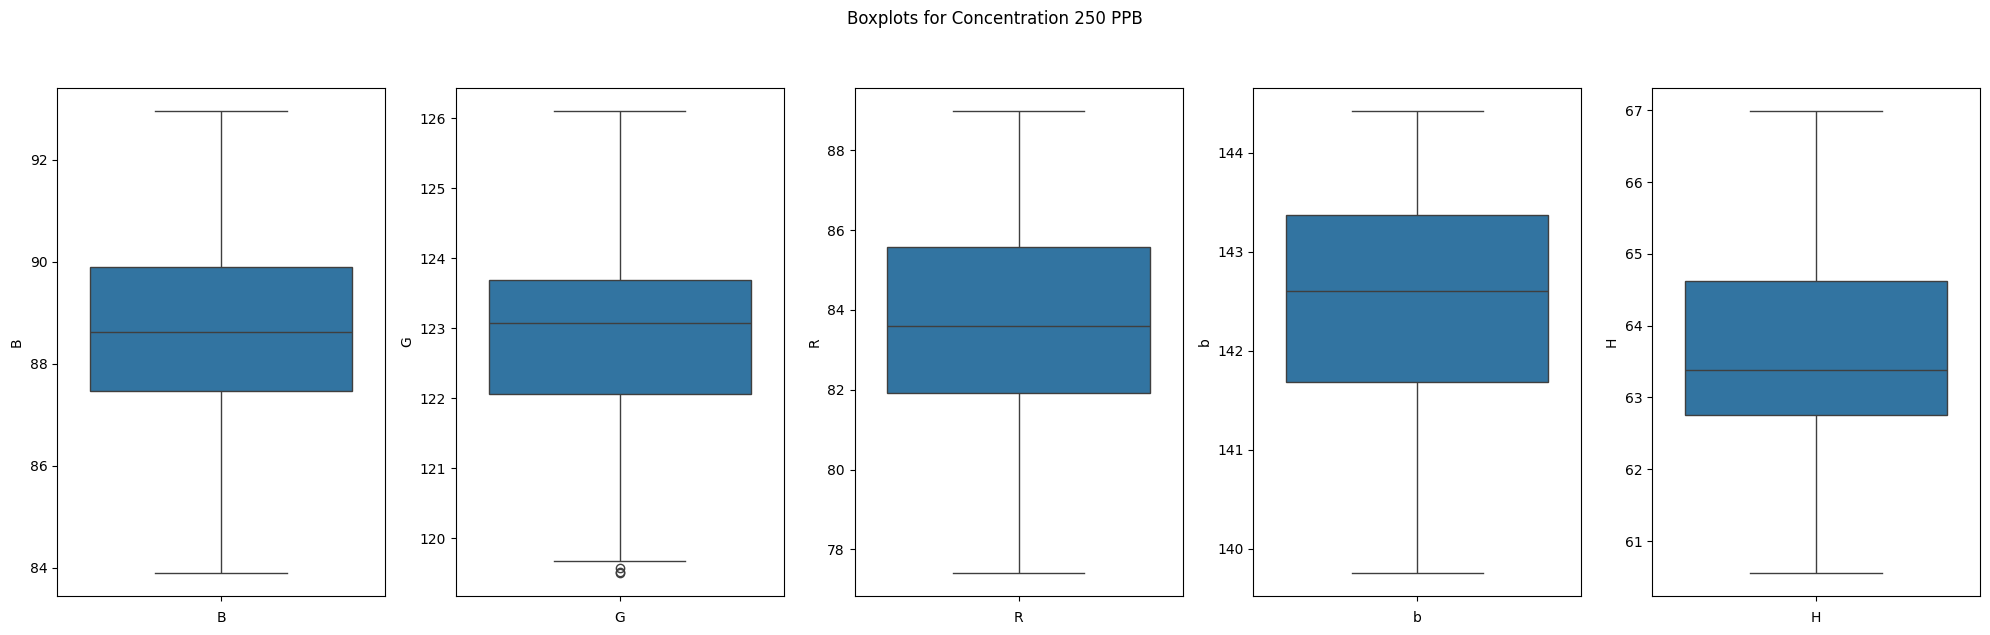

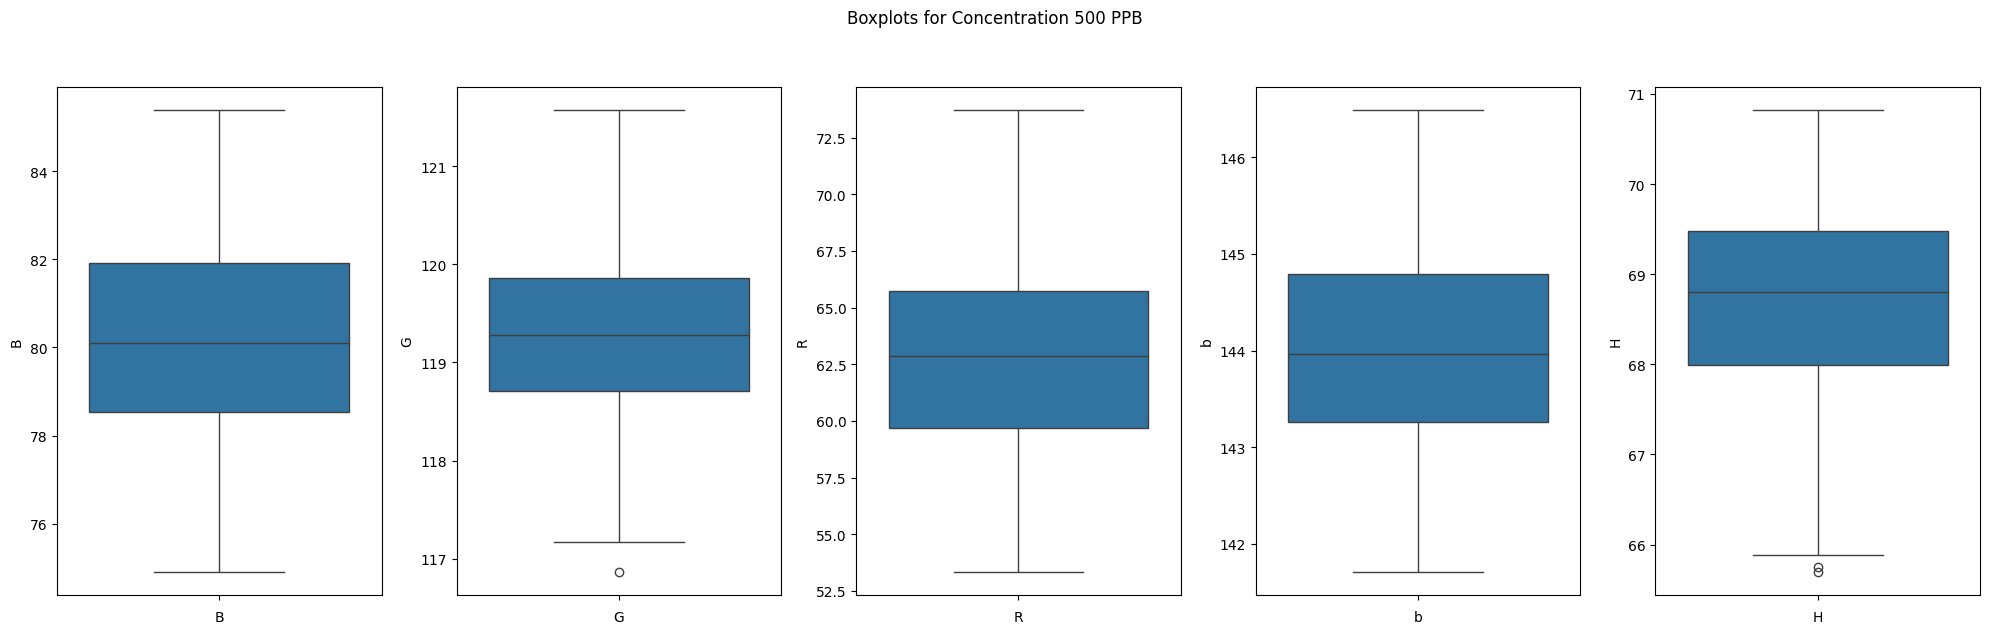

In [ ]:
for concentration, df_subset in dfs_removed_outliers.items():
    fig, axes = plt.subplots(nrows=1, ncols=len(df_subset[features].columns), figsize=(20, 6))  # Adjusted figsize for better layout
    fig.suptitle(f'Boxplots for Concentration {concentration} PPB', y=1.05)  # Title for the entire figure

    for i, column in enumerate(df_subset[features].columns):
        sns.boxplot(df_subset[features], y=column, ax=axes[i])  # Correctly passing the entire DataFrame and specifying the column
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [ ]:
combined_df = pd.concat(dfs_removed_outliers.values())

In [ ]:
combined_df.sort_index(inplace = True)

In [ ]:
combined_df['Conc'].value_counts()

Conc
250    382
50     364
500    356
100    346
25     302
Name: count, dtype: int64

In [ ]:
combined_df

B       G      R      b      H  Conc
TestNO                                          
1       78.79  119.07  56.63  144.2  70.60   500
1       88.77  120.10  80.05  140.8  66.58   250
2       92.00  129.00  94.00  144.0  58.00    25
2       92.00  129.00  92.00  144.0  60.00    50
2       89.54  122.94  85.67  142.2  63.12   250
...       ...     ...    ...    ...    ...   ...
496     94.00  131.00  96.00  144.0  58.00    25
497     92.00  129.00  94.00  144.0  58.00    25
498     93.00  130.00  96.00  144.0  58.00    25
499     92.00  129.00  95.00  144.0  58.00    25
500     92.00  128.00  94.00  144.0  58.00    25

[1750 rows x 6 columns]

In [ ]:
combined_df.to_csv("Chromuim_cleaned1.csv")

In [ ]:
df=combined_df.copy()

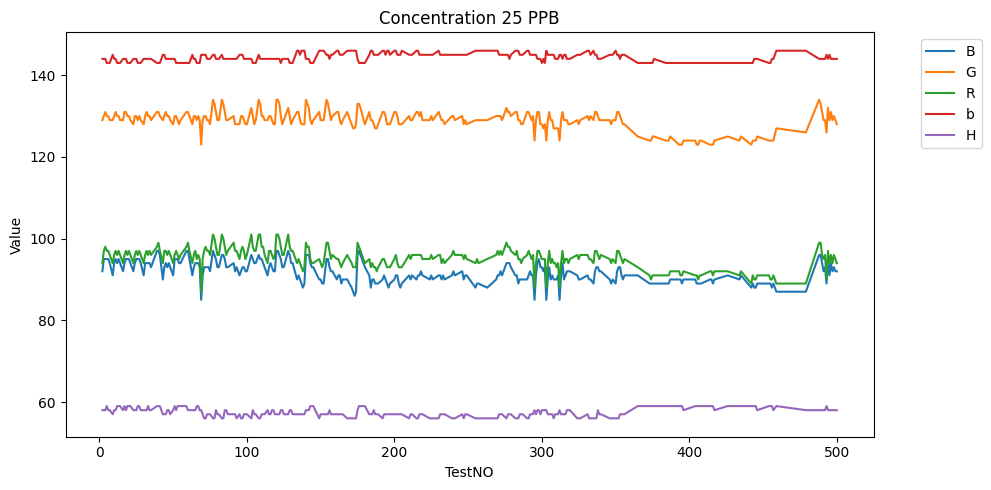

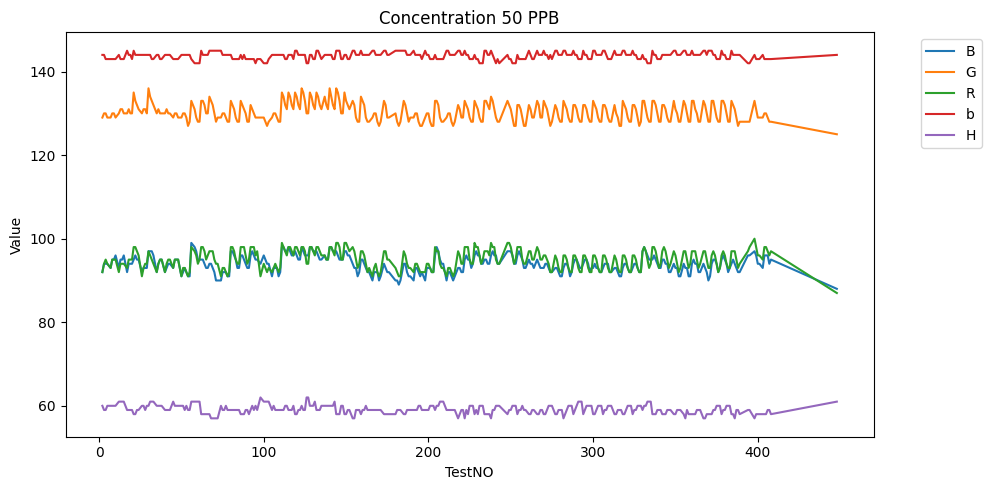

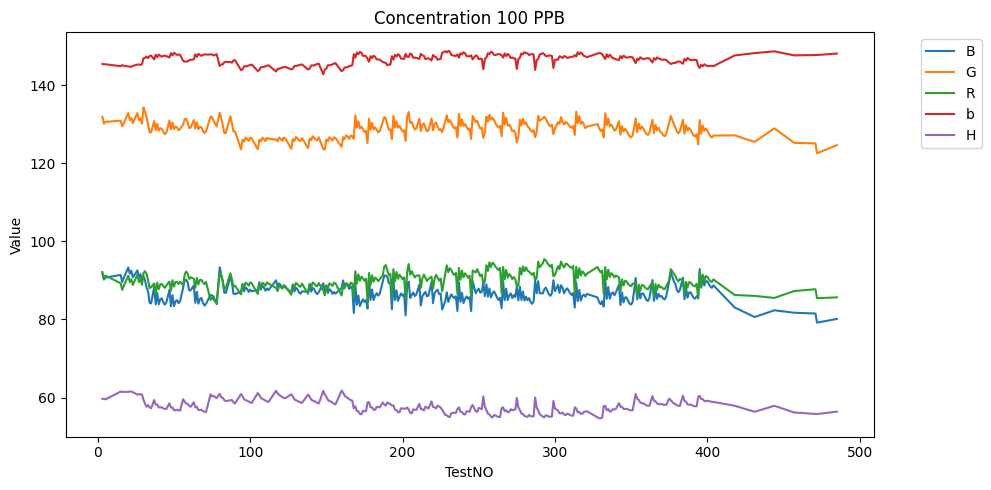

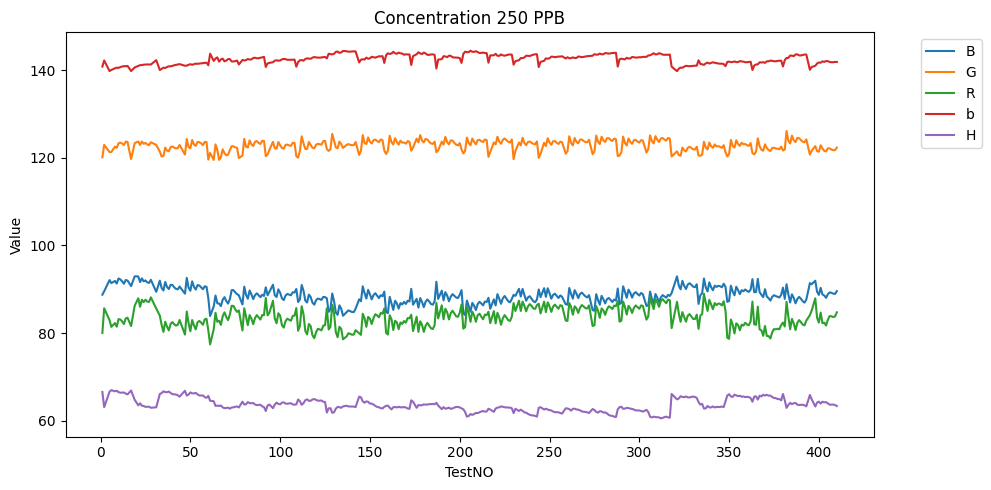

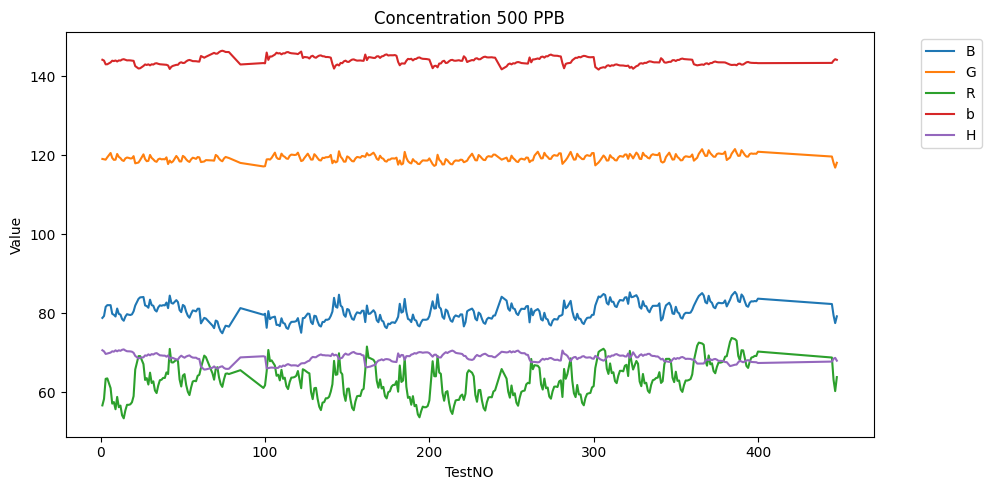

In [ ]:
variables = ['B', 'G', 'R', 'b', 'H']
def plotwrtindex(df, variables, title):
    plt.figure(figsize=(10, 5))
    for var in variables:
        plt.plot(df.index, df[var], label=var)
    plt.xlabel('TestNO')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Example values
values = [25, 50, 100, 250, 500]

table = []
for value in values:
    new_df = df[df['Conc'] == value]
    table.append(new_df)

# Plot each subset DataFrame
for i, df_subset in enumerate(table):
    plotwrtindex(df_subset, variables, f'Concentration {values[i]} PPB')

- Thus we can a almost consistent data across the experiments done


In [ ]:


def check_multivariate_normality(df):
    results = {}

    # Perform multivariate normality test using pingouin
    mvn_test = pg.multivariate_normality(df)
    results['MVN Test'] = mvn_test

    # Check for multicollinearity using VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    results['VIF'] = vif_data

    # Evaluate sample size
    n_samples, n_features = df.shape
    results['Sample Size'] = n_samples
    results['Number of Features'] = n_features
    results['Sufficient Sample Size'] = n_samples >= n_features * 5

    # Print the results
    print("Multivariate Normality Test results:")
    print(mvn_test)
    print(f"Variance Inflation Factor (VIF):\n{vif_data}")
    print(f"Sample Size: {n_samples}, Number of Features: {n_features}")
    if results['Sufficient Sample Size']:
        print("Sample size is sufficient.")
    else:
        print("Warning: Sample size may be too small for reliable estimation of covariance matrix.")

    return results

# Define features to use for the multivariate normality check
features = ['B', 'G', 'R', 'b', 'H']  # Replace with actual feature names



# Apply the function to the combined DataFrame
results_combined = check_multivariate_normality(df[features])


Multivariate Normality Test results:
HZResults(hz=34.02890203909922, pval=0.0, normal=False)
Variance Inflation Factor (VIF):
  feature           VIF
0       B  17485.073965
1       G  16136.331472
2       R   5178.155590
3       b  21196.675801
4       H   9075.017988
Sample Size: 1750, Number of Features: 5
Sample size is sufficient.


Total number of outliers: 35


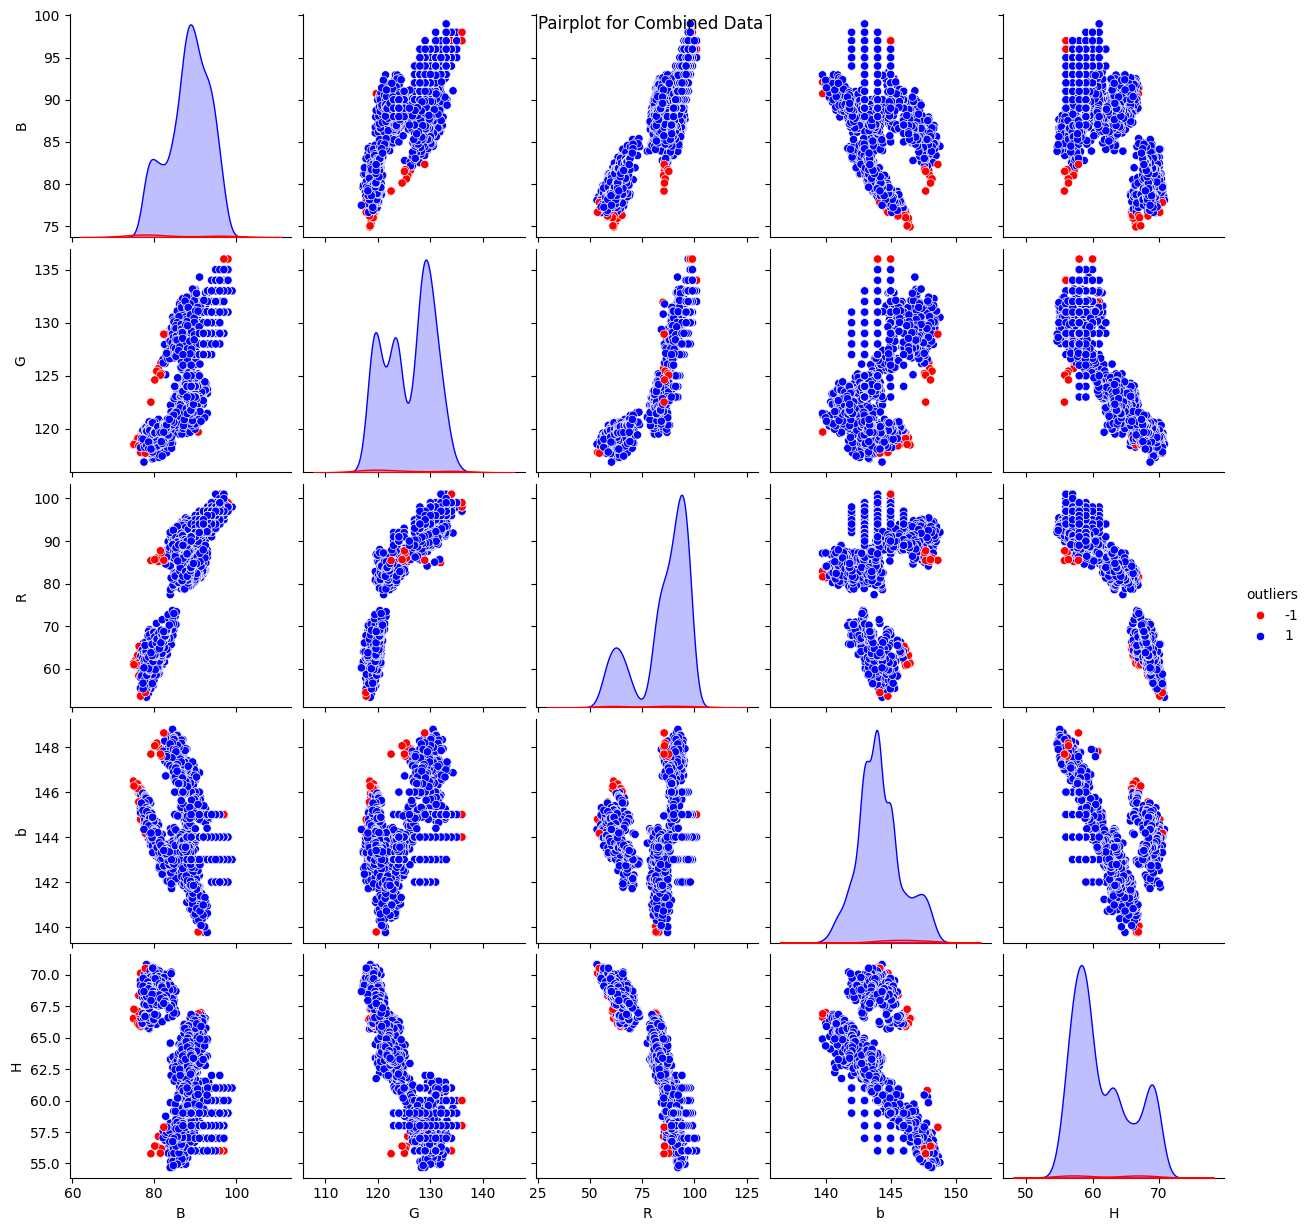

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def detect_outliers(df, features):
    # Initialize Isolation Forest model
    clf = IsolationForest(random_state=0, contamination=0.02)

    # Fit the model on the selected features
    clf.fit(df[features])

    # Predict outliers (1 for normal, -1 for outliers)
    df['outliers'] = clf.predict(df[features])

    return df

def detect_and_visualize_outliers(df, features):
    # Detect outliers
    df_with_outliers = detect_outliers(df, features)

    # Count the number of outliers
    num_outliers = (df_with_outliers['outliers'] == -1).sum()
    print(f"Total number of outliers: {num_outliers}")

    # Plot a pairplot to visualize the outliers
    sns.pairplot(df_with_outliers[features + ['outliers']], hue='outliers', palette={1: 'blue', -1: 'red'}, diag_kind='kde')
    plt.suptitle('Pairplot for Combined Data')
    plt.show()

    # Remove outliers
    df_no_outliers = df_with_outliers[df_with_outliers['outliers'] == 1].drop(columns=['outliers'])

    return df_with_outliers, df_no_outliers

# Define features to use for outlier detection
features = ['B', 'G', 'R', 'b', 'H']  # Replace with actual feature names

# Apply the function to the combined DataFrame
df_with_outliers_combined, df_no_outliers_combined = detect_and_visualize_outliers(df, features)



In [64]:
# Optionally, print the DataFrame with outliers removed
print("DataFrame with outliers removed:")
df_no_outliers_combined

DataFrame with outliers removed:


B       G      R      b      H  Conc
TestNO                                          
1       78.79  119.07  56.63  144.2  70.60   500
1       88.77  120.10  80.05  140.8  66.58   250
2       92.00  129.00  94.00  144.0  58.00    25
2       92.00  129.00  92.00  144.0  60.00    50
2       89.54  122.94  85.67  142.2  63.12   250
...       ...     ...    ...    ...    ...   ...
496     94.00  131.00  96.00  144.0  58.00    25
497     92.00  129.00  94.00  144.0  58.00    25
498     93.00  130.00  96.00  144.0  58.00    25
499     92.00  129.00  95.00  144.0  58.00    25
500     92.00  128.00  94.00  144.0  58.00    25

[1715 rows x 6 columns]

In [65]:
df_no_outliers_combined["Conc"].value_counts()

Conc
250    379
50     360
500    342
100    337
25     297
Name: count, dtype: int64

In [66]:
df_no_outliers_combined.to_csv("Chromium_cleaned_final.csv")

In [67]:
df=df_no_outliers_combined.copy()

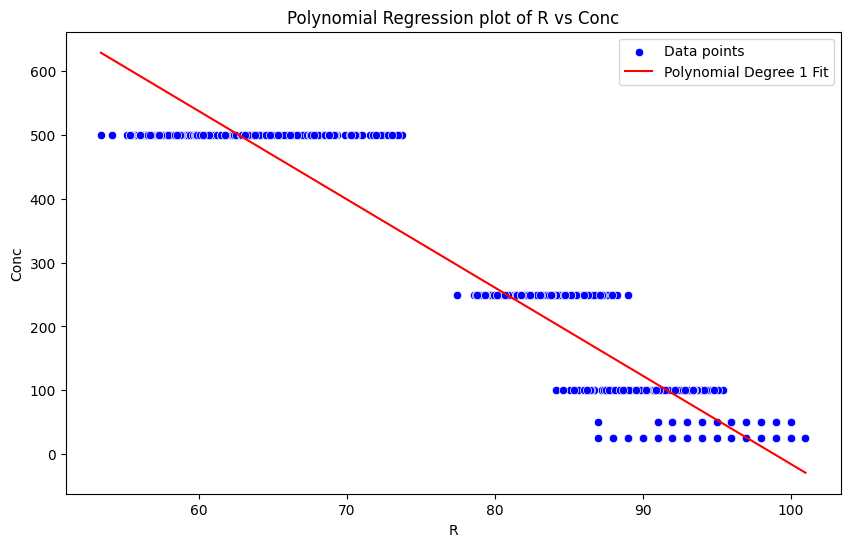

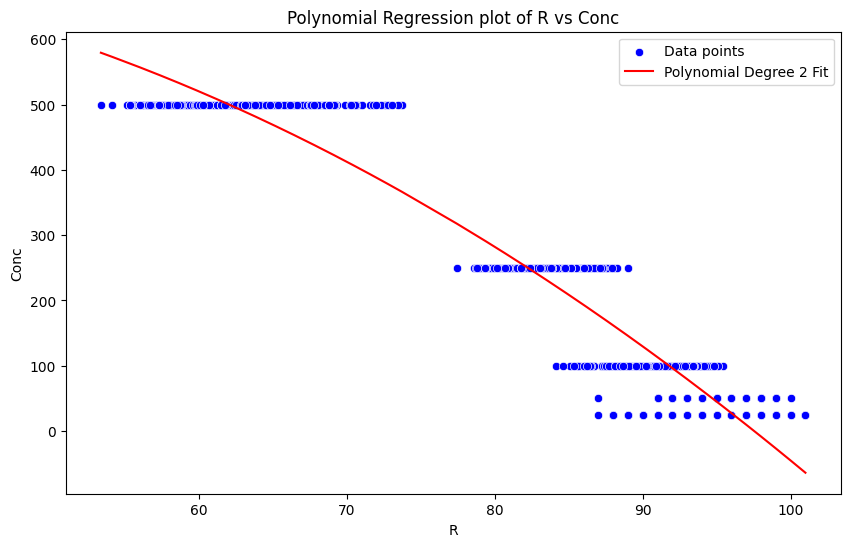

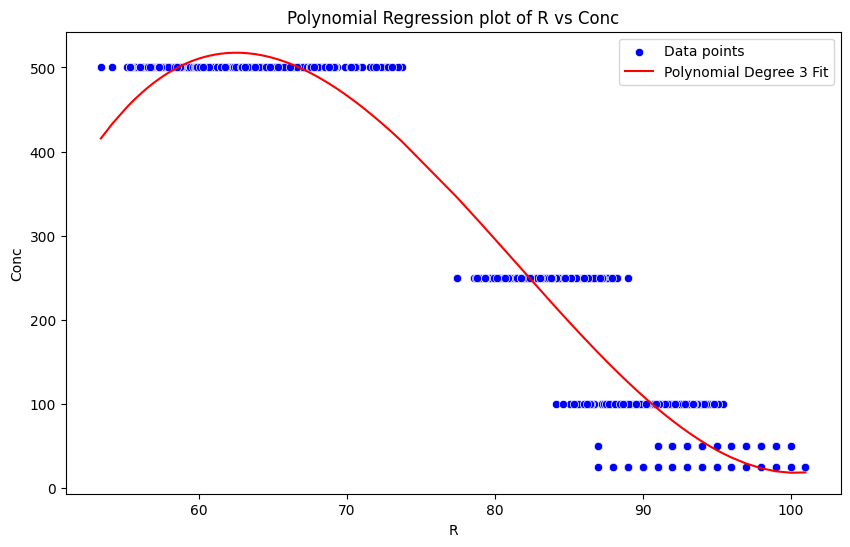

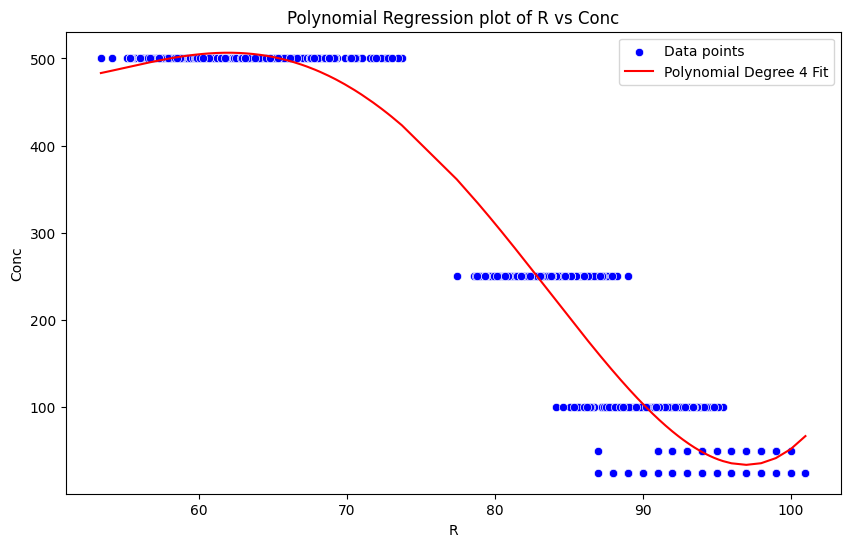

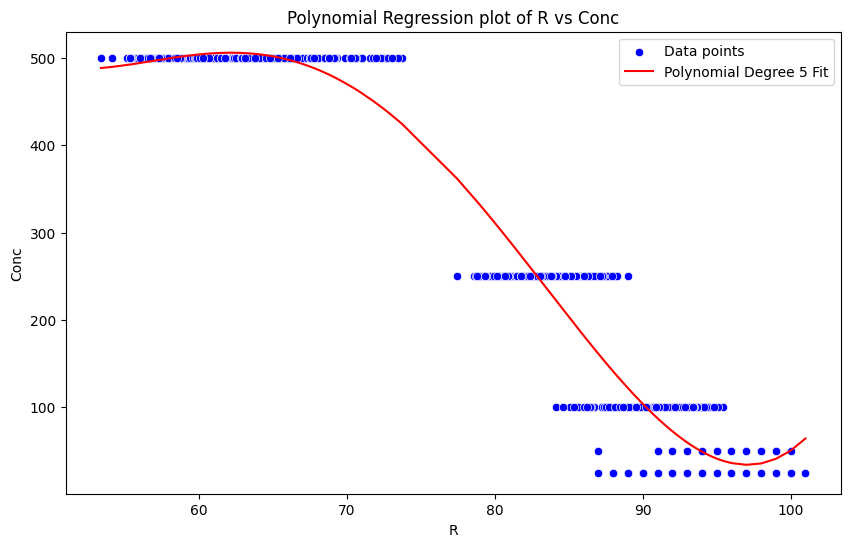

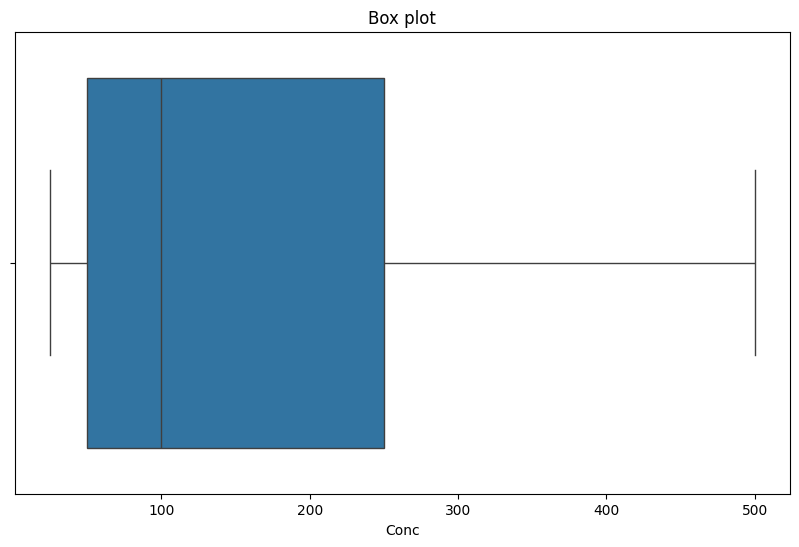

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

# Assuming your data is in a DataFrame `combined_df`
# and has columns 'concentration' and 'image_param'

# Function to plot polynomial regression
def plot_polynomial_regression(df, var, degree=2):
    X = df[[var]].values
    y = df['Conc'].values

    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Sort the values for plotting
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X, y_poly_pred), key=sort_axis)
    X_sorted, y_poly_pred_sorted = zip(*sorted_zip)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='Conc', data=df, color='blue', label='Data points')
    plt.plot(X_sorted, y_poly_pred_sorted, color='red', label=f'Polynomial Degree {degree} Fit')
    plt.title(f'Polynomial Regression plot of {var} vs Conc')
    plt.xlabel(var)
    plt.ylabel('Conc')
    plt.legend()
    plt.show()

# Function to perform degree tuning
def tune_polynomial_degree(df, var, max_degree=5):
    for degree in range(1, max_degree + 1):
        plot_polynomial_regression(df, var, degree)

# Example usage for tuning
tune_polynomial_degree(df, 'R', max_degree=5)

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Conc', data=df)
plt.title('Box plot')
plt.show()


In [69]:
pip install catboost

In [70]:
random = 42

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Conc', axis=1)
y = df['Conc']

# Scalers for feature scaling
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
scaler = scalers[2]
pt = PowerTransformer()

# Create a stratified splitter
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random)

# Generate the train and test indices
for train_index, test_index in stratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [73]:
# Original distribution
print("Original distribution:")
print(pd.Series(y).value_counts(normalize=True))

# Training set distribution
print("\nTraining set distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

# Test set distribution
print("\nTest set distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Original distribution:
Conc
250    0.220991
50     0.209913
500    0.199417
100    0.196501
25     0.173178
Name: proportion, dtype: float64

Training set distribution:
Conc
250    0.220845
50     0.209913
500    0.199708
100    0.196064
25     0.173469
Name: proportion, dtype: float64

Test set distribution:
Conc
250    0.221574
50     0.209913
100    0.198251
500    0.198251
25     0.172012
Name: proportion, dtype: float64


In [74]:


# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R-squared
def adjusted_r2_score(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Initialize models with hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(random_state=random), {'alpha': [0.1, 1, 10]}),
    'Lasso Regression': (Lasso(random_state=random), {'alpha': [0.1, 1, 10]}),
    'ElasticNet': (ElasticNet(random_state=random), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}),
    'Support Vector Regression': (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}),
    'Decision Tree Regression': (DecisionTreeRegressor(random_state=random), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest Regression': (RandomForestRegressor(random_state=random), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'Gradient Boosting Regression': (GradientBoostingRegressor(random_state=random), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'AdaBoost Regression': (AdaBoostRegressor(random_state=random), {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'Extra Trees Regression': (ExtraTreesRegressor(random_state=random), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'K-Nearest Neighbors': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'XGBoost': (xgb.XGBRegressor(random_state=random), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'LightGBM': (lgb.LGBMRegressor(random_state=random), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'CatBoost': (cb.CatBoostRegressor(random_state=random, silent=True), {'iterations': [500, 1000], 'learning_rate': [0.05, 0.1, 0.2]}),
    'Neural Network': (MLPRegressor(random_state=random), {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'learning_rate_init': [0.001, 0.01]})
}


# Train, predict, and evaluate each model with hyperparameter tuning
results = []
cv_details = {}

for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('power_transform', pt),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, {'model__' + key: value for key, value in params.items()}, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])

    # Extract CV scores
    cv_results = grid_search.cv_results_
    mean_cv_scores = cv_results['mean_test_score']
    std_cv_scores = cv_results['std_test_score']
    params_list = cv_results['params']

    # Store detailed CV scores
    cv_details[name] = pd.DataFrame({
        'Params': params_list,
        'Mean CV Score': -mean_cv_scores,  # Negate because scoring='neg_mean_absolute_error'
        'CV Score Std Dev': std_cv_scores
    })

    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R-squared': r2,
        'Adjusted R-squared': adj_r2,
        'Best Params': grid_search.best_params_,
        'Mean CV Score': -np.mean(mean_cv_scores),  # Average CV score
        'CV Score Std Dev': np.mean(std_cv_scores)  # Average standard deviation
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 1097, number of used features: 5
[LightGBM] [Info] Start training from score 192.092069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 1097, number of used features: 5
[LightGBM] [Info] Start training from score 188.673655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [75]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print("Summary of Model Evaluation Metrics:")
results_df

Summary of Model Evaluation Metrics:


Model          MSE       RMSE        MAE  \
0              Linear Regression  2228.374824  47.205665  36.292482   
1               Ridge Regression  2227.828257  47.199876  36.284922   
2               Lasso Regression  2231.877125  47.242747  36.352735   
3                     ElasticNet  2622.007939  51.205546  41.105692   
4      Support Vector Regression   851.511295  29.180666  17.907126   
5       Decision Tree Regression   354.598654  18.830790   3.423921   
6       Random Forest Regression   125.527778  11.203918   3.193977   
7   Gradient Boosting Regression   196.007614  14.000272   4.897712   
8            AdaBoost Regression   304.512736  17.450293   9.012812   
9         Extra Trees Regression    90.103641   9.492294   3.002759   
10           K-Nearest Neighbors    94.549725   9.723668   2.696793   
11                       XGBoost   286.449680  16.924824   3.950764   
12                      LightGBM   479.295492  21.892818   6.286296   
13                      CatBoost   122.821090  11.082468   4.469121   
14                Neural Network   416.577135  20.410221  11.763204   

         MAPE  R-squared  Adjusted R-squared  \
0   54.849539   0.926339            0.925247   
1   54.752377   0.926358            0.925265   
2   54.279095   0.926224            0.925129   
3   59.753894   0.913328            0.912042   
4   20.870090   0.971853            0.971435   
5    5.566431   0.988278            0.988105   
6    6.058289   0.995851            0.995789   
7    7.433736   0.993521            0.993425   
8   20.592291   0.989934            0.989785   
9    5.368812   0.997022            0.996977   
10   6.030126   0.996875            0.996828   
11   6.372050   0.990531            0.990391   
12   8.089822   0.984157            0.983921   
13   6.628530   0.995940            0.995880   
14  16.284426   0.986230            0.986025   

                                          Best Params  Mean CV Score  \
0                                                  {}      34.789739   
1                               {'model__alpha': 0.1}      35.543655   
2                               {'model__alpha': 0.1}      38.155393   
3       {'model__alpha': 0.1, 'model__l1_ratio': 0.8}      60.672170   
4   {'model__C': 10, 'model__epsilon': 0.5, 'model...      52.998742   
5                          {'model__max_depth': None}       3.934735   
6   {'model__max_depth': None, 'model__n_estimator...       3.857751   
7   {'model__learning_rate': 0.2, 'model__n_estima...       5.526059   
8   {'model__learning_rate': 0.05, 'model__n_estim...       9.521278   
9   {'model__max_depth': None, 'model__n_estimator...       3.752510   
10                          {'model__n_neighbors': 3}       3.408526   
11  {'model__learning_rate': 0.1, 'model__n_estima...       4.576862   
12  {'model__learning_rate': 0.1, 'model__n_estima...       5.544613   
13  {'model__iterations': 1000, 'model__learning_r...       5.633383   
14  {'model__activation': 'tanh', 'model__hidden_l...      52.064928   

    CV Score Std Dev  
0           0.874989  
1           0.909843  
2           1.078117  
3           1.865229  
4           1.985182  
5           0.388367  
6           0.244852  
7           0.275503  
8           0.718851  
9           0.285993  
10          0.333904  
11          0.812089  
12          0.244590  
13          0.217583  
14          2.446459

In [76]:
print("\nDetailed Cross-Validation Scores:")
for model_name, cv_df in cv_details.items():
    print(f"\nModel: {model_name}")
    print(cv_df)


Detailed Cross-Validation Scores:

Model: Linear Regression
  Params  Mean CV Score  CV Score Std Dev
0     {}      34.789739          0.874989

Model: Ridge Regression
                  Params  Mean CV Score  CV Score Std Dev
0  {'model__alpha': 0.1}      34.780320          0.875934
1    {'model__alpha': 1}      34.794344          0.870521
2   {'model__alpha': 10}      37.056301          0.983076

Model: Lasso Regression
                  Params  Mean CV Score  CV Score Std Dev
0  {'model__alpha': 0.1}      34.768668          0.866189
1    {'model__alpha': 1}      38.106306          1.074122
2   {'model__alpha': 10}      41.591205          1.294040

Model: ElasticNet
                                          Params  Mean CV Score  \
0  {'model__alpha': 0.1, 'model__l1_ratio': 0.2}      42.955096   
1  {'model__alpha': 0.1, 'model__l1_ratio': 0.5}      41.575421   
2  {'model__alpha': 0.1, 'model__l1_ratio': 0.8}      39.186013   
3    {'model__alpha': 1, 'model__l1_ratio': 0.2}      

In [77]:
for result in results:
    print(f"Best parameters for {result['Model']}: {result['Best Params']}")

Best parameters for Linear Regression: {}
Best parameters for Ridge Regression: {'model__alpha': 0.1}
Best parameters for Lasso Regression: {'model__alpha': 0.1}
Best parameters for ElasticNet: {'model__alpha': 0.1, 'model__l1_ratio': 0.8}
Best parameters for Support Vector Regression: {'model__C': 10, 'model__epsilon': 0.5, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best parameters for Decision Tree Regression: {'model__max_depth': None}
Best parameters for Random Forest Regression: {'model__max_depth': None, 'model__n_estimators': 100}
Best parameters for Gradient Boosting Regression: {'model__learning_rate': 0.2, 'model__n_estimators': 200}
Best parameters for AdaBoost Regression: {'model__learning_rate': 0.05, 'model__n_estimators': 50}
Best parameters for Extra Trees Regression: {'model__max_depth': None, 'model__n_estimators': 100}
Best parameters for K-Nearest Neighbors: {'model__n_neighbors': 3}
Best parameters for XGBoost: {'model__learning_rate': 0.1, 'model__n_estimato

In [78]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge

# Define the base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=100, random_state=random)),
    ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random)),
    ('knn', KNeighborsRegressor(n_neighbors=3)),
    ('decision_tree', DecisionTreeRegressor(max_depth=None, random_state=random)),
    ('xgboost', xgb.XGBRegressor(learning_rate=0.1, n_estimators=200, random_state=random))
]

# Define the final estimator for stacking
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(random_state=random)
)

# Define the voting regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Create pipelines for stacking and voting regressors
stacking_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', pt),
    ('model', stacking_regressor)
])

voting_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', pt),
    ('model', voting_regressor)
])

# Train and evaluate Stacking Regressor
stacking_pipeline.fit(X_train, y_train)
y_pred_stacking = stacking_pipeline.predict(X_test)
print("Stacking Regressor Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_stacking)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stacking))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_stacking)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_stacking)}")
print(f"R-squared: {r2_score(y_test, y_pred_stacking)}")
print(f"Adjusted R-squared: {adjusted_r2_score(r2_score(y_test, y_pred_stacking), len(y_test), X_test.shape[1])}")

print("....................................................")

# Train and evaluate Voting Regressor
voting_pipeline.fit(X_train, y_train)
y_pred_voting = voting_pipeline.predict(X_test)
print("Voting Regressor Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_voting)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_voting))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_voting)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_voting)}")
print(f"R-squared: {r2_score(y_test, y_pred_voting)}")
print(f"Adjusted R-squared: {adjusted_r2_score(r2_score(y_test, y_pred_voting), len(y_test), X_test.shape[1])}")


Stacking Regressor Metrics:
MSE: 92.38876290419805
RMSE: 9.611907349959115
MAE: 3.061657685697399
MAPE: 5.696480505527109
R-squared: 0.9969460236036607
Adjusted R-squared: 0.9969007123811631
....................................................
Voting Regressor Metrics:
MSE: 110.92080963511893
RMSE: 10.531894873911291
MAE: 3.1361794749828835
MAPE: 5.7383706865805015
R-squared: 0.9963334335925705
Adjusted R-squared: 0.9962790334975048


In [79]:
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=voting_pipeline
)

# Define the pipeline including scaling, power transformation, and the Stacking Regressor
pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', PowerTransformer()),
    ('stacking', stacking_regressor)
])

# Train the Stacking Regressor
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_stacking = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_stacking)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_stacking)
mape = mean_absolute_percentage_error(y_test, y_pred_stacking)
r2 = r2_score(y_test, y_pred_stacking)
adj_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])

print("Stacking Regressor with Voting Regressor - Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

Stacking Regressor with Voting Regressor - Metrics:
MSE: 138.5188634324344
RMSE: 11.769403699101938
MAE: 3.1401795338147838
MAPE: 6.35363256125852
R-squared: 0.9954211602572376
Adjusted R-squared: 0.9953532249494814


In [80]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# random_state = 42

# # Define the base models for stacking
# base_models = [
#     ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
#     ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
#     ('knn', KNeighborsRegressor(n_neighbors=3)),
#     ('decision_tree', DecisionTreeRegressor(max_depth=None, random_state=random_state)),
#     ('xgboost', xgb.XGBRegressor(learning_rate=0.1, n_estimators=200, random_state=random_state))
# ]
# final_estimator = xgb.XGBRegressor(random_state=random_state)

# # Define the Stacking Regressor with XGBoost as the final estimator
# stacking_regressor = StackingRegressor(
#     estimators=base_models,
#     final_estimator=final_estimator
# )

# # Define the pipeline including scaling, power transformation, and the Stacking Regressor
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('power_transform', PowerTransformer()),
#     ('stacking', stacking_regressor)
# ])

# # Define parameter distribution for hyperparameter tuning of the final XGBoost estimator
# param_dist = {
#     'stacking__final_estimator__learning_rate': uniform(0.01, 0.2),
#     'stacking__final_estimator__n_estimators': randint(100, 500),
#     'stacking__final_estimator__max_depth': randint(3, 10),
#     'stacking__final_estimator__subsample': uniform(0.7, 0.3),
#     'stacking__final_estimator__colsample_bytree': uniform(0.7, 0.3)
# }

# # Perform RandomizedSearchCV for Stacking Regressor
# random_search = RandomizedSearchCV(
#     pipeline,
#     param_distributions=param_dist,
#     n_iter=20,  # Number of parameter settings to sample
#     cv=5,
#     scoring='neg_mean_absolute_error',
#     n_jobs=-1,  # Use all available cores
#     random_state=random_state,
#     verbose=1
# )

# # Train the model with RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Get the best model and evaluate
# best_model = random_search.best_estimator_
# y_pred_stacking = best_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred_stacking)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred_stacking)
# mape = mean_absolute_percentage_error(y_test, y_pred_stacking)
# r2 = r2_score(y_test, y_pred_stacking)
# adj_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])

# print("Best Stacking Regressor with XGBoost as Final Estimator - Metrics:")
# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")
# print(f"MAPE: {mape}")
# print(f"R-squared: {r2}")
# print(f"Adjusted R-squared: {adj_r2}")
# print("Best Parameters:")
# print(random_search.best_params_)
random_state = 42

# Define the base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('knn', KNeighborsRegressor(n_neighbors=3)),
    ('decision_tree', DecisionTreeRegressor(max_depth=None, random_state=random_state)),
    ('xgboost', xgb.XGBRegressor(learning_rate=0.1, n_estimators=200, random_state=random_state))
]
final_estimator = xgb.XGBRegressor(random_state=random_state)

# Define the Stacking Regressor with XGBoost as the final estimator
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator
)

# Define the pipeline including scaling, power transformation, and the Stacking Regressor
pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', PowerTransformer()),
    ('stacking', stacking_regressor)
])

# Define parameter distribution for hyperparameter tuning of the final XGBoost estimator
param_dist = {
    'stacking__final_estimator__learning_rate': uniform(0.01, 0.2),
    'stacking__final_estimator__n_estimators': randint(100, 500),
    'stacking__final_estimator__max_depth': randint(3, 10),
    'stacking__final_estimator__subsample': uniform(0.7, 0.3),
    'stacking__final_estimator__colsample_bytree': uniform(0.7, 0.3)
}

# Perform RandomizedSearchCV for Stacking Regressor
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,  # Use all available cores
    random_state=random_state,
    verbose=1
)

# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model and evaluate
best_model = random_search.best_estimator_
y_pred_stacking = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_stacking)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_stacking)
mape = mean_absolute_percentage_error(y_test, y_pred_stacking)
r2 = r2_score(y_test, y_pred_stacking)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Best Stacking Regressor with XGBoost as Final Estimator - Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print("Best Parameters:")
print(random_search.best_params_)

# Print the average CV score
cv_scores = random_search.cv_results_['mean_test_score']
avg_cv_score = -cv_scores.mean()  # Since we use negative MAE, we negate it to get the positive value
print(f"Average CV Score (MAE): {avg_cv_score}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Stacking Regressor with XGBoost as Final Estimator - Metrics:
MSE: 72.4686405980555
RMSE: 8.512851496299904
MAE: 2.7418516120132135
MAPE: 5.705640985249778
R-squared: 0.9976044974420671
Adjusted R-squared: 0.997568955861089
Best Parameters:
{'stacking__final_estimator__colsample_bytree': 0.8199582915145766, 'stacking__final_estimator__learning_rate': 0.019333132642723086, 'stacking__final_estimator__max_depth': 6, 'stacking__final_estimator__n_estimators': 370, 'stacking__final_estimator__subsample': 0.8368209952651107}
Average CV Score (MAE): 5.365298247089398


-- save this pipeline ...MAE : 2.7, RMSE : 8.5

In [81]:
import time

In [82]:
import joblib

# Save the trained pipeline to a file
filename = 'best_chromium_regressor_pipeline.joblib'
joblib.dump(best_model, filename)
print(f"Pipeline saved to {filename}")


import pickle

# Save the trained pipeline to a file
filename = 'best_chromium_regressor_pipeline.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Pipeline saved to {filename}")



Pipeline saved to best_chromium_regressor_pipeline.joblib
Pipeline saved to best_chromium_regressor_pipeline.pkl


In [83]:
# checking the  correct pipeline has been saved


# Load the pipeline from the file
loaded_pipeline = joblib.load(filename)
print(f"Pipeline loaded from {filename}")

# Example of making predictions with the loaded pipeline
y_pred_loaded = loaded_pipeline.predict(X_test)

# Evaluate the loaded pipeline
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
rmse_loaded = np.sqrt(mse_loaded)
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
mape_loaded = mean_absolute_percentage_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)
adj_r2_loaded = adjusted_r2_score(r2_loaded, len(y_test), X_test.shape[1])

print("Loaded Pipeline Metrics:")
print(f"MSE: {mse_loaded}")
print(f"RMSE: {rmse_loaded}")
print(f"MAE: {mae_loaded}")
print(f"MAPE: {mape_loaded}")
print(f"R-squared: {r2_loaded}")
print(f"Adjusted R-squared: {adj_r2_loaded}")


print(".............................................")


# Load the pipeline from the file
with open(filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)
print(f"Pipeline loaded from {filename}")

# Example of making predictions with the loaded pipeline
y_pred_loaded = loaded_pipeline.predict(X_test)

# Evaluate the loaded pipeline
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
rmse_loaded = np.sqrt(mse_loaded)
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
mape_loaded = mean_absolute_percentage_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)
adj_r2_loaded = adjusted_r2_score(r2_loaded, len(y_test), X_test.shape[1])

print("Loaded Pipeline Metrics:")
print(f"MSE: {mse_loaded}")
print(f"RMSE: {rmse_loaded}")
print(f"MAE: {mae_loaded}")
print(f"MAPE: {mape_loaded}")
print(f"R-squared: {r2_loaded}")
print(f"Adjusted R-squared: {adj_r2_loaded}")


Pipeline loaded from best_chromium_regressor_pipeline.pkl
Loaded Pipeline Metrics:
MSE: 72.4686405980555
RMSE: 8.512851496299904
MAE: 2.7418516120132135
MAPE: 5.705640985249778
R-squared: 0.9976044974420671
Adjusted R-squared: 0.997568955861089
.............................................
Pipeline loaded from best_chromium_regressor_pipeline.pkl
Loaded Pipeline Metrics:
MSE: 72.4686405980555
RMSE: 8.512851496299904
MAE: 2.7418516120132135
MAPE: 5.705640985249778
R-squared: 0.9976044974420671
Adjusted R-squared: 0.997568955861089


In [84]:
random_state = 42

# Define the base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('knn', KNeighborsRegressor(n_neighbors=3)),
    ('decision_tree', DecisionTreeRegressor(max_depth=None, random_state=random_state)),
    ('xgboost', xgb.XGBRegressor(learning_rate=0.1, n_estimators=200, random_state=random_state)),
    ('voting_regressor', voting_pipeline)  # Ensure `voting_pipeline` is defined elsewhere
]


# Define XGBoost as the final estimator
final_estimator = xgb.XGBRegressor(random_state=random_state)

# Define the Stacking Regressor with XGBoost as the final estimator
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator
)

# Define the pipeline including scaling, power transformation, and the Stacking Regressor
pipeline2 = Pipeline([
    ('scaler', scaler),
    ('power_transform', PowerTransformer()),
    ('stacking', stacking_regressor)
])

# Define parameter distribution for hyperparameter tuning of the final XGBoost estimator
param_dist = {
    'stacking__final_estimator__learning_rate': uniform(0.01, 0.2),
    'stacking__final_estimator__n_estimators': randint(100, 500),
    'stacking__final_estimator__max_depth': randint(3, 10),
    'stacking__final_estimator__subsample': uniform(0.7, 0.3),
    'stacking__final_estimator__colsample_bytree': uniform(0.7, 0.3)
}

# Perform RandomizedSearchCV for Stacking Regressor
random_search = RandomizedSearchCV(
    pipeline2,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,  # Use all available cores
    random_state=random_state,
    verbose=1
)

# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model and evaluate
best_model = random_search.best_estimator_
y_pred_stacking = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_stacking)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_stacking)
mape = mean_absolute_percentage_error(y_test, y_pred_stacking)
r2 = r2_score(y_test, y_pred_stacking)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Best Stacking Regressor with XGBoost as Final Estimator - Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-s   quared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print("Best Parameters:")
print(random_search.best_params_)

# Print the average CV score
cv_scores = random_search.cv_results_['mean_test_score']
avg_cv_score = -cv_scores.mean()  # Since we use negative MAE, we negate it to get the positive value
print(f"Average CV Score (MAE): {avg_cv_score}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Stacking Regressor with XGBoost as Final Estimator - Metrics:
MSE: 69.32831173877166
RMSE: 8.32636245540462
MAE: 2.7692704715117076
MAPE: 5.7404055603739135
R-squared: 0.9977083032503876
Adjusted R-squared: 0.9976743018149334
Best Parameters:
{'stacking__final_estimator__colsample_bytree': 0.7468055921327309, 'stacking__final_estimator__learning_rate': 0.041198904067240534, 'stacking__final_estimator__max_depth': 5, 'stacking__final_estimator__n_estimators': 187, 'stacking__final_estimator__subsample': 0.8001125833417065}
Average CV Score (MAE): 5.337591579818852


In [85]:
import joblib

# Save the trained pipeline to a file
filename = 'best_chromium_regressor_pipeline2.joblib'
joblib.dump(best_model, filename)
print(f"Pipeline saved to {filename}")


import pickle

# Save the trained pipeline to a file
filename = 'best_chromium_regressor_pipeline2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Pipeline saved to {filename}")



Pipeline saved to best_chromium_regressor_pipeline2.joblib
Pipeline saved to best_chromium_regressor_pipeline2.pkl


In [86]:
random_state = 42

# Define the base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('knn', KNeighborsRegressor(n_neighbors=3)),
    ('decision_tree', DecisionTreeRegressor(max_depth=None, random_state=random_state)),
    ('xgboost', xgb.XGBRegressor(learning_rate=0.1, n_estimators=200, random_state=random_state))
]

# Define Ridge as the final estimator
final_estimator = Ridge(random_state=random_state)

# Define the Stacking Regressor with Ridge as the final estimator
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator
)

# Define the pipeline including scaling, power transformation, and the Stacking Regressor
pipeline3 = Pipeline([
    ('scaler', scaler),
    ('power_transform', PowerTransformer()),
    ('stacking', stacking_regressor)
])

# Define parameter distribution for hyperparameter tuning of the final Ridge estimator
param_dist = {
    'stacking__final_estimator__alpha': uniform(0.1, 10.0),
    'stacking__final_estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

# Perform RandomizedSearchCV for Stacking Regressor
random_search = RandomizedSearchCV(
    pipeline3,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,  # Use all available cores
    random_state=random_state,
    verbose=1
)

# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model and evaluate
best_model = random_search.best_estimator_
y_pred_stacking = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_stacking)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_stacking)
mape = mean_absolute_percentage_error(y_test, y_pred_stacking)
r2 = r2_score(y_test, y_pred_stacking)
adj_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])

print("Best Stacking Regressor with Ridge as Final Estimator - Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print("Best Parameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Stacking Regressor with Ridge as Final Estimator - Metrics:
MSE: 92.3890641030367
RMSE: 9.611923017952064
MAE: 3.061660576947475
MAPE: 5.696549522795097
R-squared: 0.9969460136473185
Adjusted R-squared: 0.9969007022771007
Best Parameters:
{'stacking__final_estimator__alpha': 9.588855372533333, 'stacking__final_estimator__solver': 'lsqr'}


In [87]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
import joblib
import scipy

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("XGBoost version:", xgb.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)
print("SciPy version:", scipy.__version__)


#numy , pandas , xgboost , sklearn , joblib , scipy

NumPy version: 1.26.4
Pandas version: 2.1.4
XGBoost version: 2.1.0
scikit-learn version: 1.3.2
joblib version: 1.4.2
SciPy version: 1.13.1


## Noting the versions of the libraries to be used in Render

In [88]:
import joblib
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the trained models with the best parameters
model2 = joblib.load('best_chromium_regressor_pipeline2_Model2.joblib')
model1 = joblib.load('best_chromium_regressor_pipeline_Model1.joblib')

# Define the Voting Regressor with the loaded models
voting_regressor = VotingRegressor(estimators=[
    ('model1', model1),
    ('model2', model2)
])

# Define scalers and transformers
power_transformer = PowerTransformer()

# Define the pipeline including scaling, power transformation, and the Voting Regressor
voting_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', power_transformer),
    ('model', voting_regressor)
])

# Train and evaluate the Voting Regressor
voting_pipeline.fit(X_train, y_train)
y_pred_voting = voting_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_voting)
mape = mean_absolute_percentage_error(y_test, y_pred_voting)
r2 = r2_score(y_test, y_pred_voting)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Voting Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")


Voting Regressor Metrics:
MSE: 189.74960883726774
RMSE: 13.774963115640919
MAE: 3.1517924261510197
MAPE: 0.05761100680070438
R-squared: 0.9937276914595715
Adjusted R-squared: 0.9936346305019984


In [89]:
import joblib

# Save the trained pipeline to a file
filename = 'best_chromium_regressor_pipeline3.joblib'
joblib.dump(voting_pipeline, filename)
print(f"Pipeline saved to {filename}")


Pipeline saved to best_chromium_regressor_pipeline3.joblib
